In [3]:
%load_ext autoreload
%autoreload 1
%autosave 60

Autosaving every 60 seconds


In [4]:
import sys
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm, Normalize, TwoSlopeNorm
import scanpy
import gseapy as gp
import anndata
import seaborn as sb

In [5]:
sys.path.append("/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/")

In [6]:
import rnaseq
importlib.reload(rnaseq)

<module 'rnaseq' from '/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/__init__.py'>

In [7]:
%%bash
pwd

/u/davidm/Documents/Master-thesis/Projects/scBC-Analysis/0_Preprocessing/4_Cell-line-identity


In [8]:
# %%bash
# tar czf ./figs.tar.gz ./figs/*.pdf

### Plotting parameters

In [61]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 110
plt.rcParams['font.size'] = 6

# cl_colors = {"BT20" : "seagreen", "HCC70" : "tab:olive", "MDAMB231": "darkturquoise", "MDAMB436": "mediumaquamarine", "SKBR3": "slategray", "MCF7-atcc":"maroon", "MCF7-labo":"gold", "ZR75":"coral","T47D":"gray", "MCF7-labo + siER#1" : "pink", "MCF7-labo + siER#2" : "palevioletred", "MCF7-labo + siCTRL" : "rosybrown", "MDAMB231 + pMIG-VGLL1":"tab:purple", "MDAMB231 + pMIG-GRHL2":"indigo", "MDAMB231 + pMIG" : "dodgerblue"}
# s_colors = {"BT20 (dsp992)" : "seagreen", "HCC70 (dsp992)" : "tab:olive", "MDAMB231 (dsp992)": "darkturquoise", "MDAMB436 (dsp992)": "mediumaquamarine", "SKBR3 (dsp992)": "slategray", "MCF7-atcc (dsp762)":"maroon", "MCF7-labo (dsp762)":"khaki", "ZR75 (dsp762)":"coral","ZR75-T47D (dsp762)":"chocolate", "MCF7-labo + siER#1 (dsp779)" : "pink", "MCF7-labo + siER#2 (dsp779)" : "palevioletred", "MCF7-labo + siCTRL (dsp779)" : "rosybrown", "MCF7-labo (dsp779)" : "goldenrod", "MCF7-labo (dsp1090)" : "gold", "MCF7-atcc (dsp1090)":"firebrick", "MDAMB231 + pMIG v1 (dsp1090)":"tab:blue", "MDAMB231 + pMIG-VGLL1 (dsp1090)":"tab:purple", "MDAMB231 + pMIG-GRHL2 (dsp1090)":"indigo", "MDAMB231 + pMIG v2 (dsp1090)" : "dodgerblue"}
samples_colors = {"BT20" : "seagreen", "HCC70" : "mediumaquamarine", "MDAMB231": "darkturquoise", "MDAMB436": "tab:olive", "SKBR3": "slategray", "MCF7-atcc-1":"maroon", "MCF7-labo-1":"khaki", "ZR75":"coral","T47D":"chocolate", "ER1" : "pink", "ER2" : "palevioletred", "CTRL" : "rosybrown", "NT" : "goldenrod", "MCF7-labo-2" : "gold", "MCF7-atcc-2":"firebrick", "PMIG-1":"tab:blue", "VGLL1":"tab:purple", "GRHL2":"indigo", "PMIG-2" : "dodgerblue"}

In [10]:
from pathlib import Path
scanpy._settings.ScanpyConfig.figdir=Path('./figs/')

### Genes lists

In [23]:
cell_cycle_genes = np.array(['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG',
       'GINS2', 'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'HELLS', 'RFC2',
       'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2',
       'UBR7', 'POLD3', 'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6',
       'EXO1', 'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN',
       'POLA1', 'CHAF1B', 'BRIP1', 'E2F8', 'HMGB2', 'CDK1', 'NUSAP1',
       'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80', 'CKS2', 'NUF2',
       'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'SMC4', 'CCNB2',
       'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E', 'TUBB4B',
       'GTSE1', 'KIF20B', 'HJURP', 'CDCA3', 'CDC20', 'TTK', 'CDC25C',
       'KIF2C', 'RANGAP1', 'NCAPD2', 'DLGAP5', 'CDCA2', 'CDCA8', 'ECT2',
       'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5', 'CENPE',
       'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA'])

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

In [24]:
g2m_genes = ['ABL1', 'AMD1', 'ARID4A', 'ATF5', 'ATRX', 'AURKA', 'AURKB',
       'BARD1', 'BCL3', 'BIRC5', 'BRCA2', 'BUB1', 'BUB3', 'CASP8AP2',
       'CBX1', 'CCNA2', 'CCNB2', 'CCND1', 'CCNF', 'CCNT1', 'CDC20',
       'CDC25A', 'CDC25B', 'CDC27', 'CDC45', 'CDC6', 'CDC7', 'CDK1',
       'CDK4', 'CDKN1B', 'CDKN2C', 'CDKN3', 'CENPA', 'CENPE', 'CENPF',
       'CHAF1A', 'CHEK1', 'CHMP1A', 'CKS1B', 'CKS2', 'CTCF', 'CUL1',
       'CUL3', 'CUL4A', 'CUL5', 'DBF4', 'DDX39A', 'DKC1', 'DMD', 'DR1',
       'DTYMK', 'E2F1', 'E2F2', 'E2F3', 'E2F4', 'EFNA5', 'EGF', 'ESPL1',
       'EWSR1', 'EXO1', 'EZH2', 'FANCC', 'FBXO5', 'FOXN3', 'G3BP1',
       'GINS2', 'GSPT1', 'H2AX', 'H2AZ1', 'H2AZ2', 'H2BC12', 'HIF1A',
       'HIRA', 'HMGA1', 'HMGB3', 'HMGN2', 'HMMR', 'HNRNPD', 'HNRNPU',
       'HOXC10', 'HSPA8', 'HUS1', 'ILF3', 'INCENP', 'JPT1', 'KATNA1',
       'KIF11', 'KIF15', 'KIF20B', 'KIF22', 'KIF23', 'KIF2C', 'KIF4A',
       'KIF5B', 'KMT5A', 'KNL1', 'KPNA2', 'KPNB1', 'LBR', 'LIG3', 'LMNB1',
       'MAD2L1', 'MAP3K20', 'MAPK14', 'MARCKS', 'MCM2', 'MCM3', 'MCM5',
       'MCM6', 'MEIS1', 'MEIS2', 'MKI67', 'MNAT1', 'MT2A', 'MTF2',
       'MYBL2', 'MYC', 'NASP', 'NCL', 'NDC80', 'NEK2', 'NOLC1', 'NOTCH2',
       'NSD2', 'NUMA1', 'NUP50', 'NUP98', 'NUSAP1', 'ODC1', 'ODF2',
       'ORC5', 'ORC6', 'PAFAH1B1', 'PBK', 'PDS5B', 'PLK1', 'PLK4', 'PML',
       'POLA2', 'POLE', 'POLQ', 'PRC1', 'PRIM2', 'PRMT5', 'PRPF4B',
       'PTTG1', 'PTTG3P', 'PURA', 'RACGAP1', 'RAD21', 'RAD23B', 'RAD54L',
       'RASAL2', 'RBL1', 'RBM14', 'RPA2', 'RPS6KA5', 'SAP30', 'SFPQ',
       'SLC12A2', 'SLC38A1', 'SLC7A1', 'SLC7A5', 'SMAD3', 'SMARCC1',
       'SMC1A', 'SMC2', 'SMC4', 'SNRPD1', 'SQLE', 'SRSF1', 'SRSF10',
       'SRSF2', 'SS18', 'STAG1', 'STIL', 'STMN1', 'SUV39H1', 'SYNCRIP',
       'TACC3', 'TENT4A', 'TFDP1', 'TGFB1', 'TLE3', 'TMPO', 'TNPO2',
       'TOP1', 'TOP2A', 'TPX2', 'TRA2B', 'TRAIP', 'TROAP', 'TTK', 'UBE2C',
       'UBE2S', 'UCK2', 'UPF1', 'WRN', 'XPO1', 'YTHDC1']

### Load sample

In [25]:
# quant_params = "trimmed-reads-cutadapt-all/EGFP-decoys-k31-1.4.0/customWh-top-3000"
# genref = "human/assembly__GRCh38-hg38/annotation__gencode/gencode_34"
# project = "dsp1090"

In [261]:
sc = rnaseq.readwrite.read_filtered(samples = "all")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


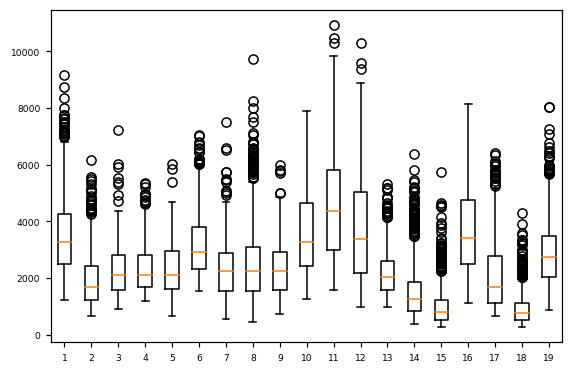

In [264]:
plt.boxplot([sc.obs["NumGenesExpressed"][sc.obs["samples"]==s] for s in np.unique(sc.obs["samples"])], );

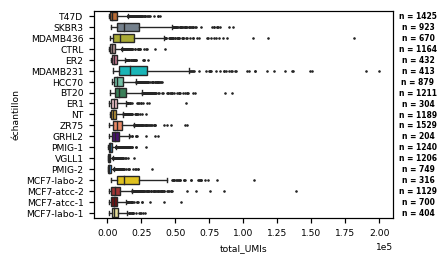

In [290]:
feature  = 'total_UMIs'

plt.subplots(figsize=(3.5,2.5))
sc.obs_names_make_unique()
df = pd.DataFrame([sc.obs[feature], sc.obs['samples']], index = [f"{feature}", "échantillon"]).T
df[f"{feature}"] = df[f"{feature}"].astype(float)
ax = sb.boxplot(x = f"{feature}", y = "échantillon", data = df, orient = 'h', linewidth=0.9, fliersize = 0.8, palette = samples_colors)

medians = df.groupby(['échantillon'])[f"{feature}"].median().values
nobs = {}
for k,v in zip(np.unique(sc.obs['samples'], return_counts=True)[0], np.unique(sc.obs['samples'], return_counts=True)[1]) :
    nobs[k] = f"n = {v}"
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_yticklabels()) :
    ax.text(np.max(sc.obs[feature]) + np.max(sc.obs[feature])/7,
            tick+0.25,
            nobs[label.get_text()],
            horizontalalignment='center',
            size='small',
            color='black',
            weight='semibold')
    
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

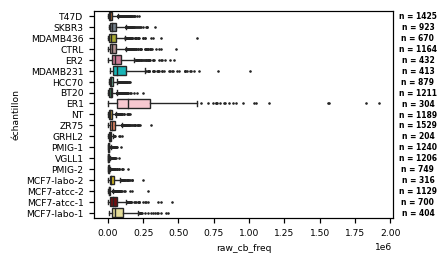

In [292]:
feature  = 'raw_cb_freq'

plt.subplots(figsize=(3.5,2.5))
sc.obs_names_make_unique()
df = pd.DataFrame([sc.obs[feature], sc.obs['samples']], index = [f"{feature}", "échantillon"]).T
df[f"{feature}"] = df[f"{feature}"].astype(float)
ax = sb.boxplot(x = f"{feature}", y = "échantillon", data = df, orient = 'h', linewidth=0.9, fliersize = 0.8, palette = samples_colors)

medians = df.groupby(['échantillon'])[f"{feature}"].median().values
nobs = {}
for k,v in zip(np.unique(sc.obs['samples'], return_counts=True)[0], np.unique(sc.obs['samples'], return_counts=True)[1]) :
    nobs[k] = f"n = {v}"
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_yticklabels()) :
    ax.text(np.max(sc.obs[feature]) + np.max(sc.obs[feature])/7,
            tick+0.25,
            nobs[label.get_text()],
            horizontalalignment='center',
            size='small',
            color='black',
            weight='semibold')
    
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [231]:
# sc._inplace_subset_var([not g.startswith("RP") for g in sc.var_names])
# sc._inplace_subset_var([not g.startswith("MT") for g in sc.var_names])
rnaseq.pp.filter_genes(sc, n_counts = 1, n_samples = 5)
# rnaseq.pp.filter_genes(sc)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [180]:
sc.X.shape

(16087, 26449)

In [181]:
# rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, log = False, verbose = True)
# rnaseq.setup.save_layer(sc)
# sc.layers

In [182]:
samples_colors.keys()

dict_keys(['BT20', 'HCC70', 'MDAMB231', 'MDAMB436', 'SKBR3', 'MCF7-atcc-1', 'MCF7-labo-1', 'ZR75', 'T47D', 'ER1', 'ER2', 'CTRL', 'NT', 'MCF7-labo-2', 'MCF7-atcc-2', 'PMIG-1', 'VGLL1', 'GRHL2', 'PMIG-2'])

In [232]:
samples = ['BT20', 'HCC70', 'MDAMB231', 'MDAMB436', 'SKBR3', 'ZR75', 'T47D', 'MCF7-labo-2', 'MCF7-atcc-2']

sc._inplace_subset_obs([s in samples for s in sc.obs["samples"]])

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [233]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)

Normalization by total UMIs...
Log2 + 1 tranformation...


In [150]:
# markers = []
# for s in np.unique(sc.obs["samples"]):
#     markers.append(sc.var_names[np.argsort(sc.X.toarray()[sc.obs["samples"]==s].mean(0))][-10:])
# markers = np.unique(np.concatenate(markers))

In [151]:
# markers = {}
# for s in np.unique(sc.obs["samples"]):
#     markers[s] = sc.var_names[np.argsort(sc.X.toarray()[sc.obs["samples"]==s].mean(0))][-1000:]

In [234]:
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

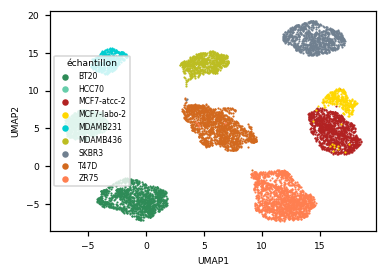

In [153]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 2, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "échantillon", linewidth=0, figsize=(3.5,2.5), save="./figs/umap_all.pdf")
plt.tight_layout()

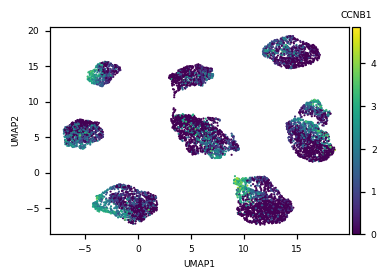

In [154]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var_names=="CCNB1"], markerscale=5,\
    s = 2, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "CCNB1", linewidth=0, figsize=(3.5,2.5), save="./figs/umap_all-ccnb1.pdf")

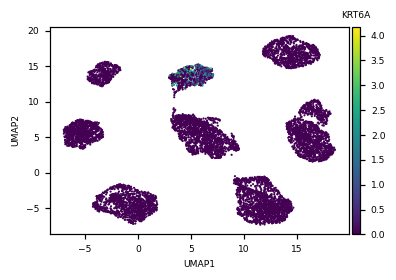

In [236]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var_names=="KRT6A"], markerscale=5,\
    s = 2, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "KRT6A", linewidth=0, figsize=(3.5,2.5), save="./figs/umap_all-krt6a.pdf")

In [181]:
# sc.write("/home/arion/davidm/Data/datasets/processed/Projects/scBC-Analysis/norm/all-samples-normalized.h5ad")

/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CB' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'samples' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a futur

In [237]:
sc = rnaseq.readwrite.read_filtered(samples = "all")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [238]:
samples = ['MDAMB436']

sc._inplace_subset_obs([s in samples for s in sc.obs["samples"]])

In [239]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)

Normalization by total UMIs...
Log2 + 1 tranformation...


In [240]:
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

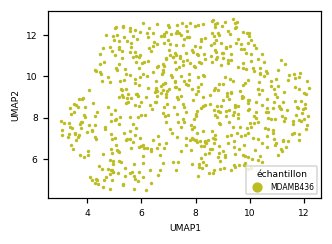

In [241]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 5, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "échantillon", linewidth=0, figsize=(3,2.2), save="./figs/umap_hcc70.pdf")
plt.tight_layout()

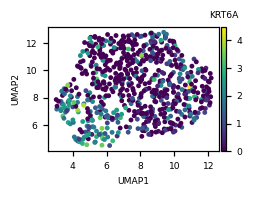

In [252]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var_names=="KRT6A"], markerscale=5,\
    s = 10, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "KRT6A", linewidth=0, figsize=(2,1.5), save="./figs/umap_krt6a-hcc70.pdf")

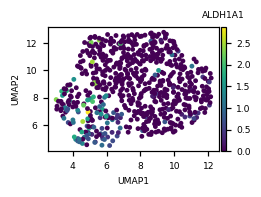

In [253]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var_names=="ALDH1A1"], markerscale=5,\
    s = 10, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "ALDH1A1", linewidth=0, figsize=(2,1.5), save="./figs/umap_ALDH1A1-hcc70.pdf")

In [254]:
sc = rnaseq.readwrite.read_filtered(samples = "all")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [255]:
samples = ['PMIG-1']

sc._inplace_subset_obs([s in samples for s in sc.obs["samples"]])

In [256]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)

Normalization by total UMIs...
Log2 + 1 tranformation...


In [257]:
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

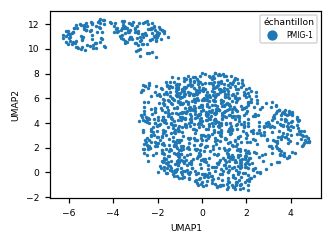

In [258]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 5, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "échantillon", linewidth=0, figsize=(3,2.2), save="./figs/umap_hcc70.pdf")
plt.tight_layout()

ValueError: 'c' argument has 0 elements, which is inconsistent with 'x' and 'y' with size 1240.

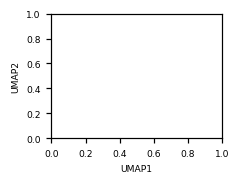

In [260]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var_names=="GFP"], markerscale=5,\
    s = 10, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "KRT6A", linewidth=0, figsize=(2,1.5), save="./figs/umap_krt6a-hcc70.pdf")

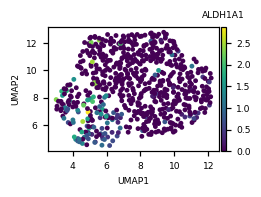

In [253]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var_names=="ALDH1A1"], markerscale=5,\
    s = 10, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "ALDH1A1", linewidth=0, figsize=(2,1.5), save="./figs/umap_ALDH1A1-hcc70.pdf")

In [293]:
sc = rnaseq.readwrite.read_filtered(samples = "all")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [294]:
samples = ['MCF7-labo-1', 'MCF7-atcc-1']

sc._inplace_subset_obs([s in samples for s in sc.obs["samples"]])

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [295]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)

Normalization by total UMIs...
Log2 + 1 tranformation...


In [296]:
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

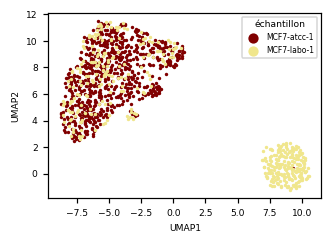

In [215]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 5, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "échantillon", linewidth=0, figsize=(3,2.2), save="./figs/umap_mcf7_samples.pdf")
plt.tight_layout()

/tmp/ipykernel_10634/3961269959.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


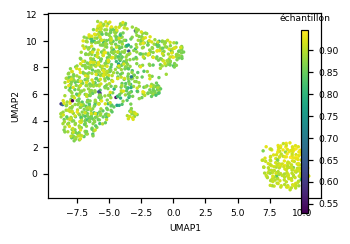

In [312]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["DedupRate"], markerscale=3,\
    s = 5, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "échantillon", linewidth=0, figsize=(3,2.2), save="./figs/umap_mcf7_samples.pdf")
plt.tight_layout()

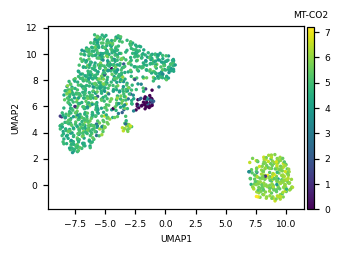

In [227]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var_names=="MT-CO2"], markerscale=5,\
    s = 5, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "MT-CO2", linewidth=0, figsize=(3,2.2), save="./figs/umap_mcf7_mtco2.pdf")

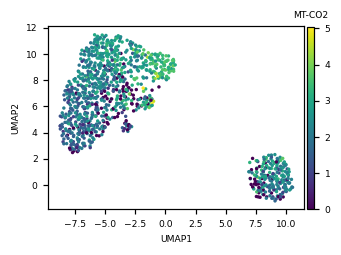

In [308]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var_names=="RPS24"], markerscale=5,\
    s = 5, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "MT-CO2", linewidth=0, figsize=(3,2.2), save="./figs/umap_mcf7_mtco2.pdf")

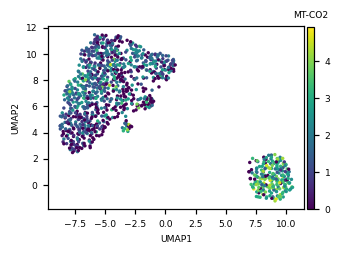

In [306]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var_names=="RHOBTB3"], markerscale=5,\
    s = 5, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "MT-CO2", linewidth=0, figsize=(3,2.2), save="./figs/umap_mcf7_mtco2.pdf")

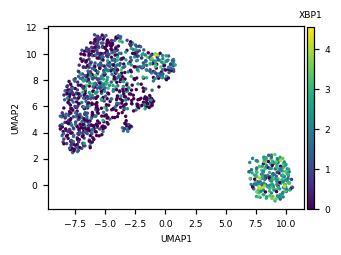

In [229]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var_names=="XBP1"], markerscale=5,\
    s = 5, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "XBP1", linewidth=0, figsize=(3,2.2), save="./figs/umap_mcf7_xbp1.pdf")

In [122]:
sc = rnaseq.readwrite.read_filtered(samples = "all")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [123]:
samples = ['GRHL2']

sc._inplace_subset_obs([s in samples for s in sc.obs["samples"]])

In [124]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)

Normalization by total UMIs...
Log2 + 1 tranformation...


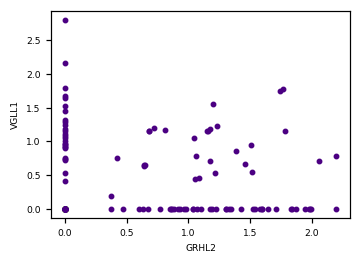

In [125]:
plt.subplots(figsize=(3.5,2.5))
plt.scatter(sc.X.toarray()[:,sc.var_names=="GRHL2"], sc.X.toarray()[:,sc.var_names=="VGLL1"], s=8, c = samples_colors["GRHL2"])
plt.xlabel("GRHL2")
plt.ylabel("VGLL1")
plt.savefig("./figs/corr_vgll1-grhl2.pdf")

In [79]:
sc = rnaseq.readwrite.read_filtered(samples = "all")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [80]:
samples = ['NT']

sc._inplace_subset_obs([s in samples for s in sc.obs["samples"]])

In [81]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)

Normalization by total UMIs...
Log2 + 1 tranformation...


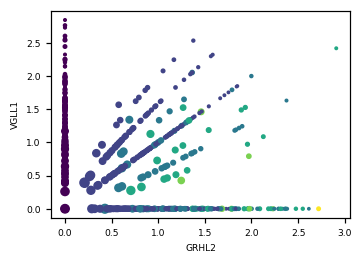

In [102]:
plt.subplots(figsize=(3.5,2.5))
plt.scatter(sc.X.toarray()[:,sc.var_names=="ESR1"], sc.X.toarray()[:,sc.var_names=="FOXA1"], s=sc.obs["total_UMIs"]/800, c = sc.layers["raw"].toarray()[:,sc.var_names=="ESR1"])
plt.xlabel("GRHL2")
plt.ylabel("VGLL1")
plt.savefig("./figs/corr_vgll1-grhl2.pdf")

### QC distributions

In [461]:
sc = anndata.read_h5ad("/home/arion/davidm/Data/datasets/processed/Projects/scBC-Analysis/norm/all-samples-normalized.h5ad")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [196]:
sc.obs["total_UMIs"].mean()

8006.7017

Normalization by total UMIs...
Log2 + 1 tranformation...


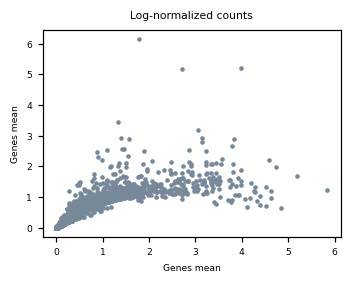

In [465]:
rnaseq.pp.log_norm(sc, plot=True, inplace=True, ow = True, verbose = True, tot=6000)
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

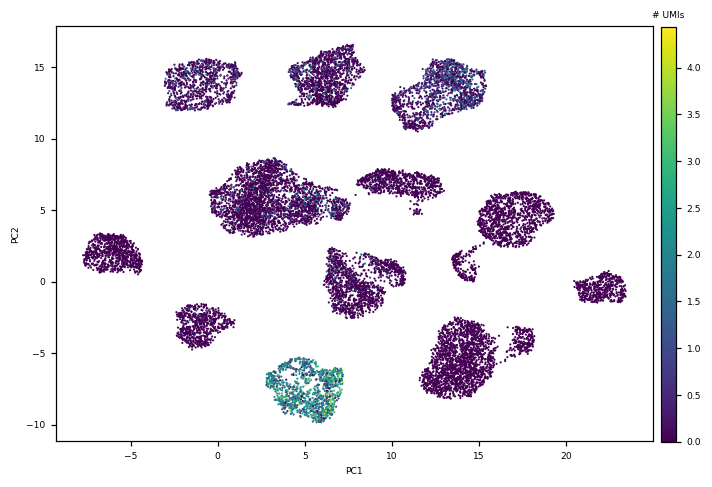

In [200]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var["external_gene_name"]=="IGFBP5"], \
    s = 2, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

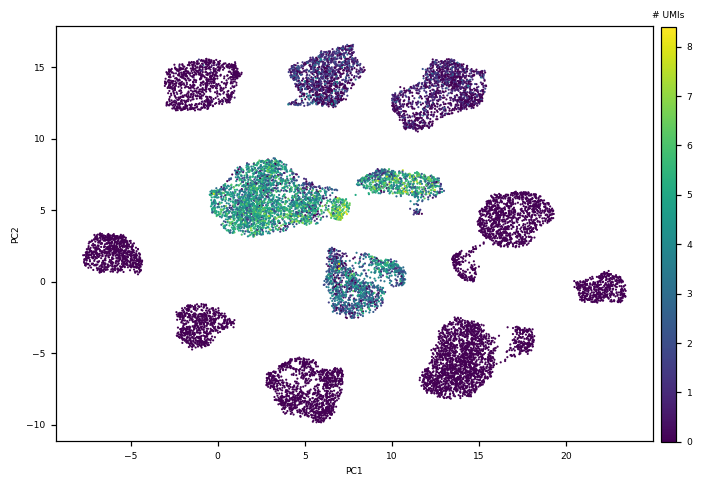

In [202]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var["external_gene_name"]=="TFF1"], \
    s = 2, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

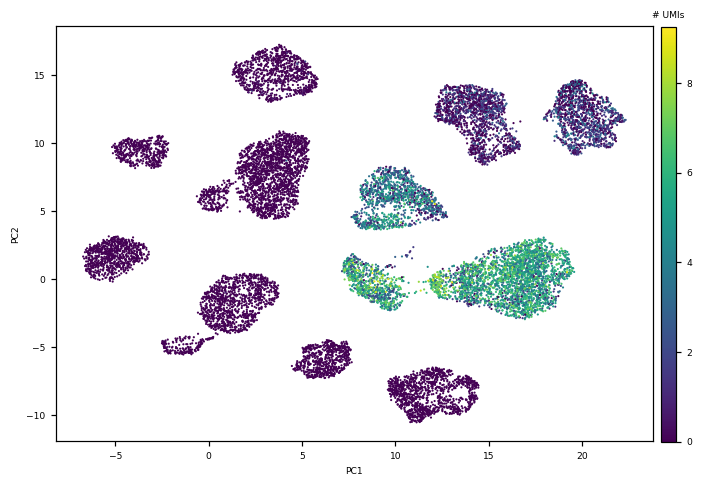

In [195]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var["external_gene_name"]=="TFF1"], \
    s = 2, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

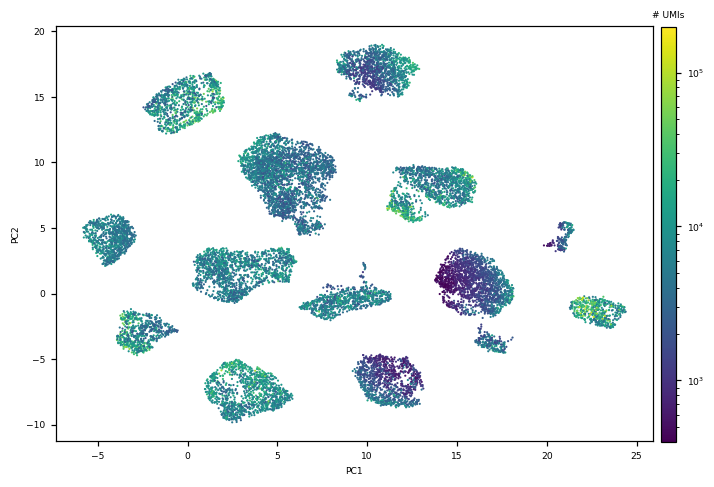

In [184]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["total_UMIs"], norm = LogNorm(),\
    s = 2, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

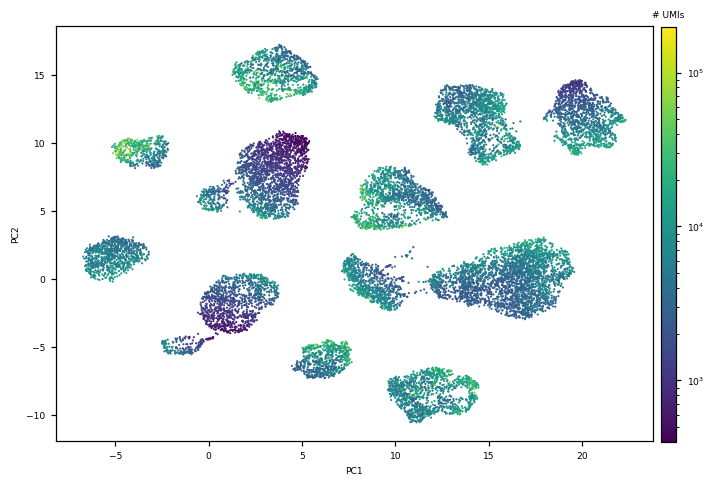

In [12]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["total_UMIs"], norm = LogNorm(),\
    s = 2, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

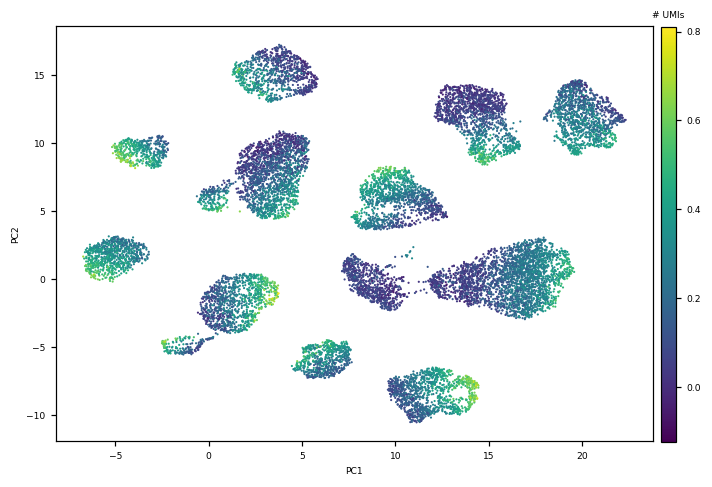

In [19]:
sc.var_names = sc.var["external_gene_name"].values
sc.var_names = np.array(sc.var_names.values)
sc.var_names_make_unique()
scanpy.tl.score_genes_cell_cycle(sc, s_genes=s_genes, g2m_genes=g2m_genes)

scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["G2M_score"],\
    s = 2, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

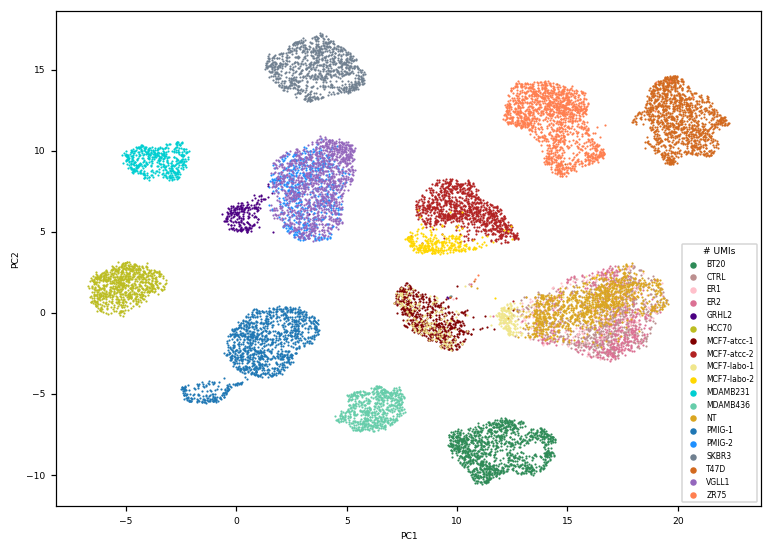

In [20]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 2, palette = samples_colors, xlabel="PC1", ylabel="PC2", color_title = "# UMIs", linewidth=0, fig=scatt)
plt.tight_layout()

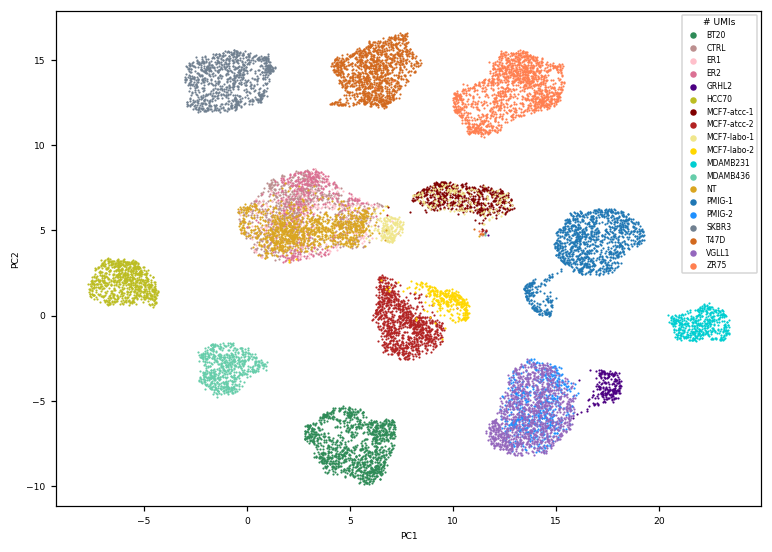

In [377]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 2, palette = samples_colors, xlabel="PC1", ylabel="PC2", color_title = "# UMIs", linewidth=0, fig=scatt)
plt.tight_layout()

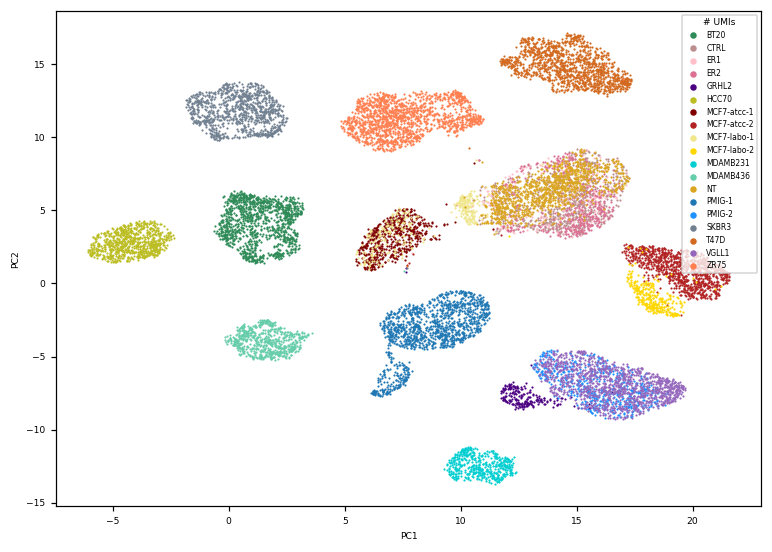

In [466]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 2, palette = samples_colors, xlabel="PC1", ylabel="PC2", color_title = "# UMIs", linewidth=0, fig=scatt)
plt.tight_layout()

In [414]:
scanpy.pp.neighbors(sc, n_neighbors=15, use_rep="X_pca")
scanpy.tl.leiden(sc, resolution=0.3)

/tmp/ipykernel_58830/225617219.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


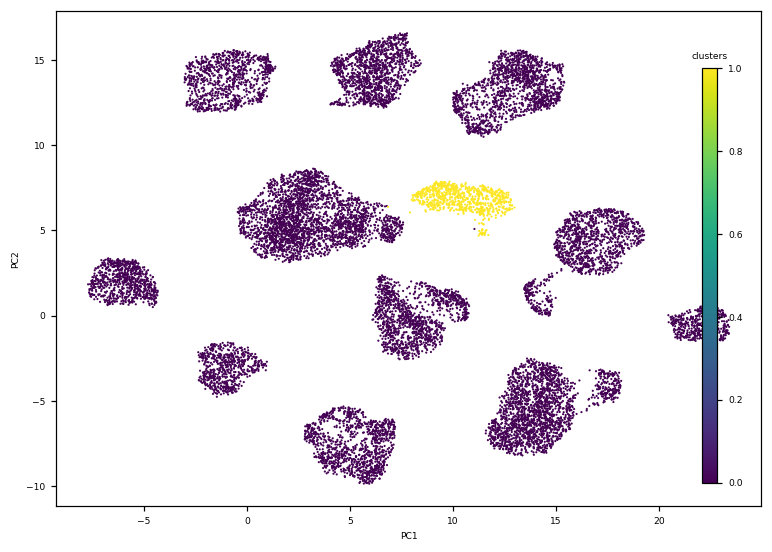

In [417]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["leiden"]=='9', markerscale=3,\
    s = 2, xlabel="PC1", ylabel="PC2", color_title = "clusters", linewidth=0, fig=scatt)
plt.tight_layout()

In [418]:
sc._inplace_subset_obs(sc.obs["leiden"]=='9')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Normalization by total UMIs...
Log2 + 1 tranformation...


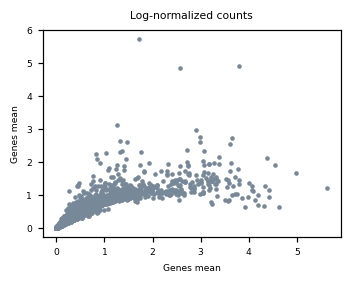

In [524]:
# tot=sc.obs["total_UMIs"].mean() - sc.obs["total_UMIs"].median()

# rnaseq.setup.load_layer(sc, "raw")
# scanpy.pp.normalize_total(sc, exclude_highly_expressed=True)
# sc.uns["layer"] = "norm"
# rnaseq.setup.save_layer(sc)

rnaseq.pp.log_norm(sc, plot=True, inplace=True, ow = 1, verbose = True)
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=30, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

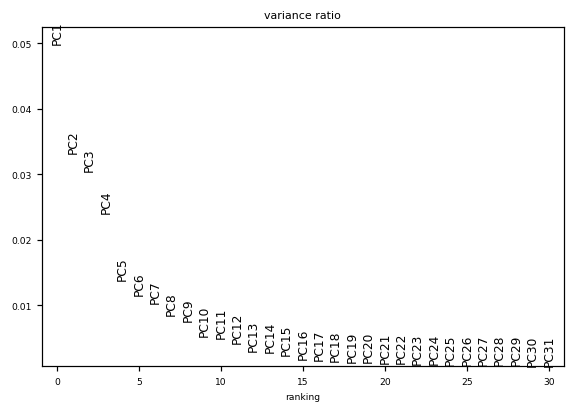

In [523]:
scanpy.pl.pca_variance_ratio(sc)

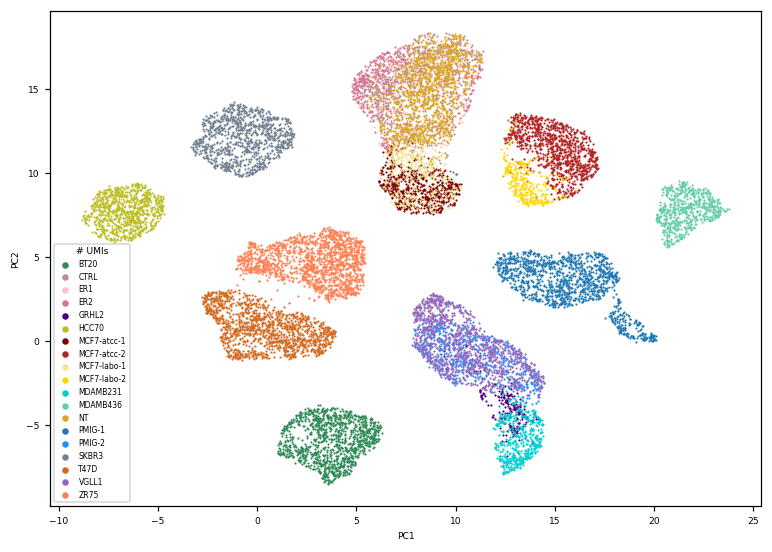

In [522]:
# scanpy.pp.neighbors(sc, n_pcs=15, n_neighbors=15)
# scanpy.tl.umap(sc, n_components=2)

scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 2, palette = samples_colors, xlabel="PC1", ylabel="PC2", color_title = "# UMIs", linewidth=0, fig=scatt, save="./umap.pdf")
plt.tight_layout()

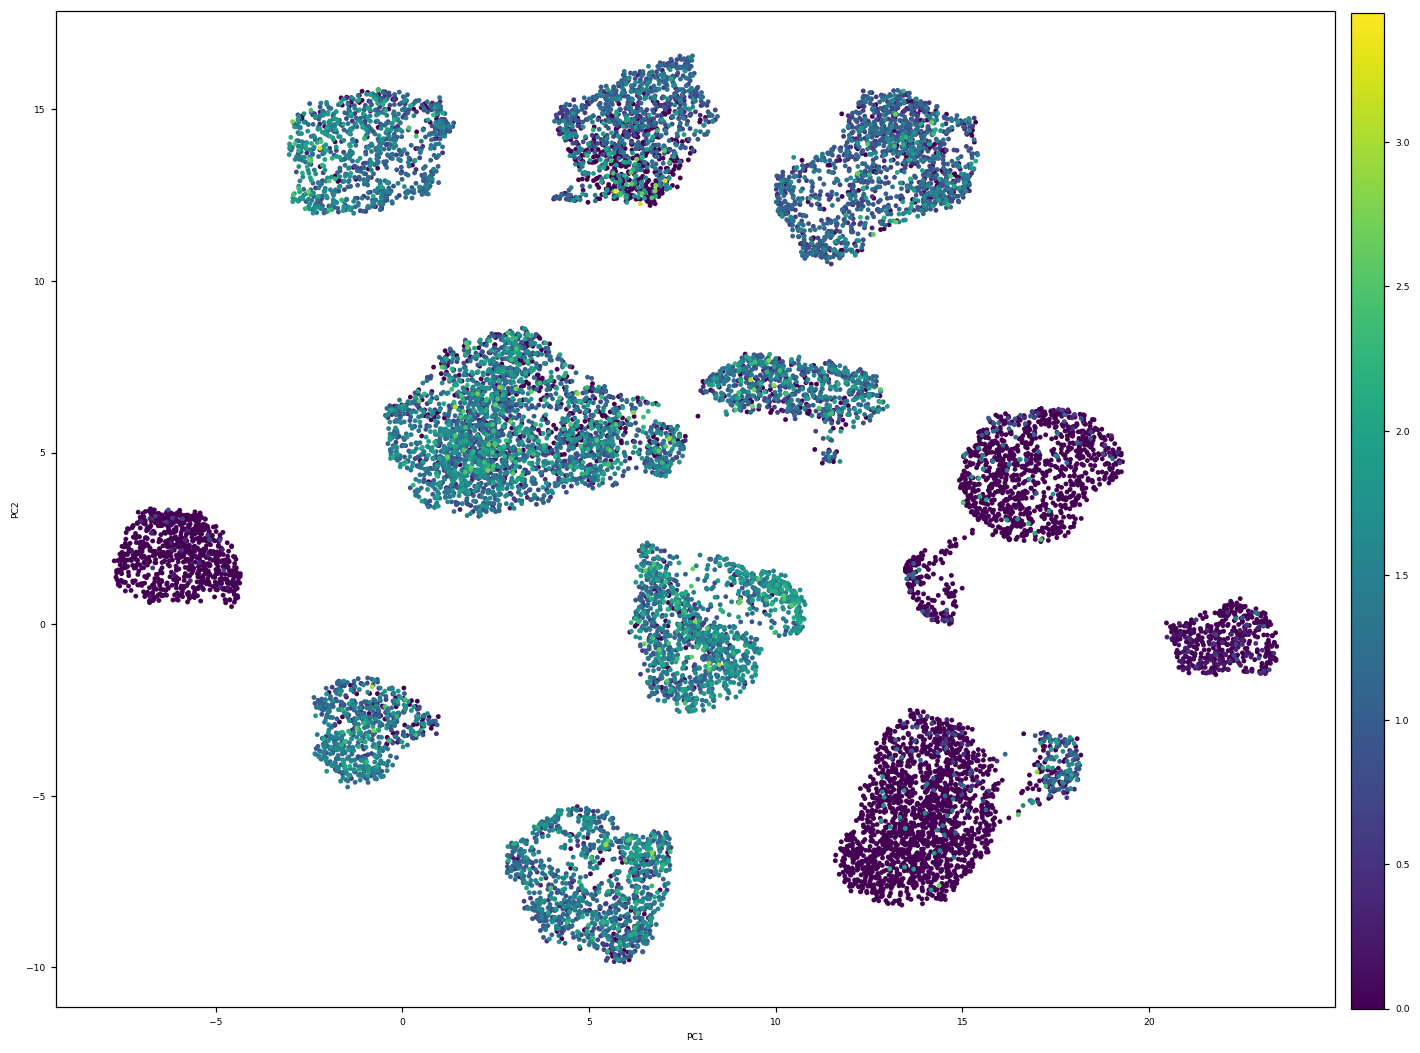

In [520]:
scatt,_ = plt.subplots(figsize=(15,12))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var["external_gene_name"]=="EPCAM"], \
    s = 10, palette = "viridis", xlabel="PC1", ylabel="PC2", order_color="ascending", fig=scatt, linewidth=0, save="./umap.pdf")

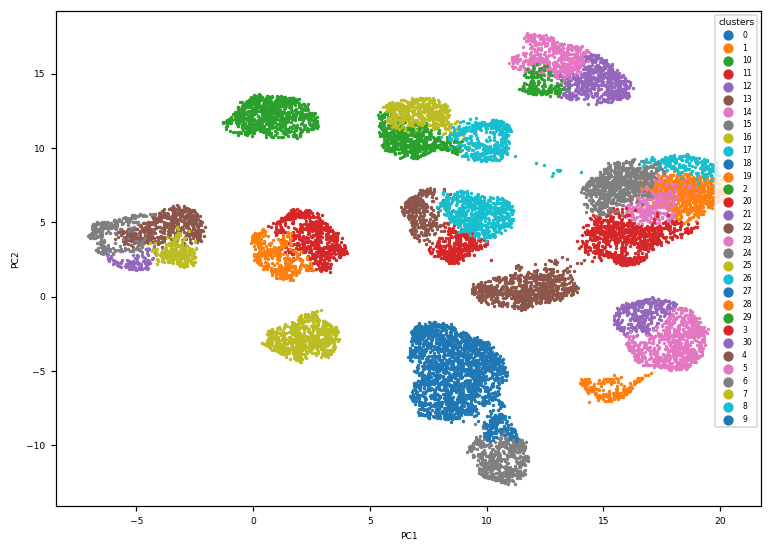

In [498]:
scanpy.tl.leiden(sc, resolution=2)

scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["leiden"], markerscale=3,\
    s = 5, xlabel="PC1", ylabel="PC2", color_title = "clusters", linewidth=0, fig=scatt)
plt.tight_layout()

In [426]:
rnaseq.setup.annotate_genes(sc, 'description')

Annotating description using Biomart (Ensembl Genes 100, 'hsapiens_gene_ensembl')...


In [427]:
sc.obs_names_make_unique()

In [428]:
gene_exp = pd.DataFrame(sc.X.toarray().T, columns = sc.obs_names)
class_vector = (sc.obs["leiden"].values == '3').astype(str)
class_vector = np.where(class_vector == 'True', "cluster", class_vector) 
class_vector = np.where(class_vector == 'False', "rest", class_vector) 

In [429]:
idx = np.argsort(class_vector)
gene_exp = gene_exp[gene_exp.columns[idx]]
gene_exp.insert(0, "DESCRIPTION", sc.var["description"].values, True)
gene_exp.insert(0, "NAME", sc.var["external_gene_name"].values, True)

class_vector = list(class_vector[idx])

In [458]:
gs_res = gp.gsea(gene_exp, # ordata='./P53_resampling_data.txt'
                 'KEGG_2021_Human', # enrichr library names
                  class_vector,
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=100, # 100 reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=8, 
                 seed= 7,
                 format='png')

2021-12-24 12:21:18,823 Warning: dropping duplicated gene names, only keep the first values


In [459]:
res = gs_res.res2d.sort_values(by='nes', ascending=False)
res = res.loc[res.index[(res['fdr'].values < 0.05) & (res['pval'].values < 0.05)]]

In [460]:
res

es       nes      pval  \
Term                                                                        
Cell cycle                                   0.483259  2.483480  0.000000   
DNA replication                              0.576909  2.202135  0.000000   
Pyrimidine metabolism                        0.572950  2.183609  0.000000   
Tryptophan metabolism                        0.638165  2.152652  0.000000   
Amino sugar and nucleotide sugar metabolism  0.530018  2.078326  0.000000   
Glutathione metabolism                       0.546332  2.058392  0.000000   
Arginine and proline metabolism              0.515011  1.992337  0.000000   
Citrate cycle (TCA cycle)                    0.529464  1.944863  0.000000   
Other types of O-glycan biosynthesis         0.454835  1.924785  0.018519   
Oocyte meiosis                               0.370791  1.903050  0.000000   
Non-alcoholic fatty liver disease           -0.387457 -1.656761  0.000000   
Thermogenesis                               -0.358083 -1.690256  0.000000   
Diabetic cardiomyopathy                     -0.373330 -1.799696  0.000000   
Parkinson disease                           -0.385929 -1.866142  0.000000   
Oxidative phosphorylation                   -0.474522 -2.125988  0.000000   
Cardiac muscle contraction                  -0.708749 -2.604343  0.000000   
Ribosome                                    -0.861812 -3.078652  0.000000   
Coronavirus disease                         -0.873429 -3.118315  0.000000   

                                                  fdr  geneset_size  \
Term                                                                  
Cell cycle                                   0.000000           124   
DNA replication                              0.016476            36   
Pyrimidine metabolism                        0.018306            56   
Tryptophan metabolism                        0.013730            42   
Amino sugar and nucleotide sugar metabolism  0.017574            48   
Glutathione metabolism                       0.016476            57   
Arginine and proline metabolism              0.034520            50   
Citrate cycle (TCA cycle)                    0.046681            30   
Other types of O-glycan biosynthesis         0.048817            47   
Oocyte meiosis                               0.049427           129   
Non-alcoholic fatty liver disease            0.037937           155   
Thermogenesis                                0.030328           232   
Diabetic cardiomyopathy                      0.010465           203   
Parkinson disease                            0.005083           249   
Oxidative phosphorylation                    0.000000           133   
Cardiac muscle contraction                   0.000000            87   
Ribosome                                     0.000000           158   
Coronavirus disease                          0.000000           232   

                                             matched_size  \
Term                                                        
Cell cycle                                            105   
DNA replication                                        34   
Pyrimidine metabolism                                  38   
Tryptophan metabolism                                  20   
Amino sugar and nucleotide sugar metabolism            32   
Glutathione metabolism                                 30   
Arginine and proline metabolism                        30   
Citrate cycle (TCA cycle)                              27   
Other types of O-glycan biosynthesis                   27   
Oocyte meiosis                                         83   
Non-alcoholic fatty liver disease                     114   
Thermogenesis                                         164   
Diabetic cardiomyopathy                               134   
Parkinson disease                                     182   
Oxidative phosphorylation                             102   
Cardiac muscle contraction                          

In [446]:
sc.var_names = sc.var["external_gene_name"].tolist()
scanpy.tl.rank_genes_groups(sc, groupby="leiden", n_genes=len(sc.var_names),rankby_abs=True, method="wilcoxon")

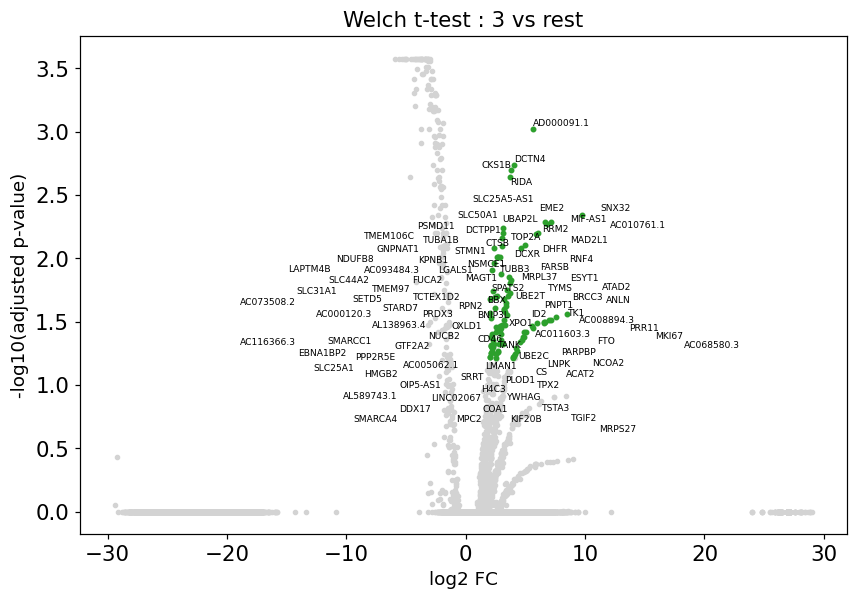

In [455]:
rnaseq.dea.volcano_plot(sc, group='3', show_genes='up', top=100)

/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/dea.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = pd.DataFrame(np.array(data[gene_set_library])[:,1:], columns=["Term", "P-value", "Z-score", "Combined Score", "Genes", "Adjusted P-value", "Old P-value", "Old adjusted P-value"])
/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/dea.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(abs(tick)) for tick in ticks])


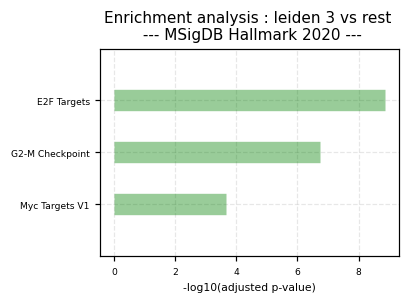

In [451]:
rnaseq.dea.enrichr(sc, group='3', libraries="MSigDB_Hallmark_2020", show = "up", lfc_cutoff_min=2)

### Markers

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.spatial import distance

In [830]:
sc.var_names = sc.var["external_gene_name"].tolist()
sc.obs_names_make_unique()
sc.var_names_make_unique()

In [831]:
log2fcs = {}
for s in np.unique(sc.obs["samples"]):
    x1 = sc[sc.obs_names[sc.obs["samples"]==s],:].layers["raw"].toarray().sum(0)
    s1 = sc[sc.obs_names[sc.obs["samples"]==s],:].layers["raw"].toarray().sum()
    x1 = 1e6 * x1 / s1 
    x2 = sc[sc.obs_names[sc.obs["samples"]!=s],:].layers["raw"].toarray().sum(0)
    s2 = sc[sc.obs_names[sc.obs["samples"]!=s],:].layers["raw"].toarray().sum()
    x2 = 1e6 * x2 / s2 
    log2fcs[s] = np.log2(x1 + 1) - np.log2(x2 + 1)

In [832]:
markers = []
for s in np.unique(sc.obs["samples"]):
    i = np.argsort(np.abs(log2fcs[s]))[-10:]
#     i = np.argsort(log2fcs[s])[-4:]
    markers.append(sc.var_names[i])
markers = np.unique(np.concatenate(markers))

In [833]:
rnaseq.setup.load_layer(sc, 'raw')
ps = rnaseq.utils.pseudobulk(sc, group_by_annot_name="samples")
rnaseq.pp.log_norm(ps, tot=1e6)

/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Using BioMart Ensembl Genes 100 hsapiens_gene_ensembl for gene annotations.
Normalization by total UMIs...
This is CPM normalization.
Log2 + 1 tranformation...


In [834]:
x = pd.DataFrame([ps[ps.obs_names[ps.obs["samples"] == s],markers].X.toarray().ravel() for s in samples])

corr_matrix = x.T.corr(method="pearson")
corr_condensed = distance.squareform(1 - corr_matrix)
z_var = sch.linkage(
    corr_condensed, method="ward", optimal_ordering=True
)
dendro_info = sch.dendrogram(z_var, labels=list(samples), no_plot=True)

dat = dict(
    linkage=z_var,
    groupby=['samples'],
    use_rep=False,
    cor_method="pearson",
    linkage_method="ward",
    categories_ordered=dendro_info['ivl'],
    categories_idx_ordered=dendro_info['leaves'],
    dendrogram_info=dendro_info,
    correlation_matrix=corr_matrix.values,
)

samples = pd.Categorical(sc.obs["samples"]).categories
sc.uns["samples_colors"] = [samples_colors[s] for s in samples]
sc.uns["dendrogram_samples"] = dat

In [835]:
np.var(corr_matrix).sum() # pearson

2.9986908282331313

In [836]:
np.var(corr_matrix).sum() # spearman

2.9986908282331313

In [837]:
x = pd.DataFrame([ps[ps.obs_names[ps.obs["samples"] == s],markers].X.toarray().mean(0) for s in samples])

corr_matrix = x.corr(method="pearson")
corr_condensed = distance.squareform(1 - corr_matrix)
z_var = sch.linkage(
    corr_condensed, method="ward", optimal_ordering=True
)
dendro_info = sch.dendrogram(z_var, labels=list(markers), no_plot=True)

markers_ordered=dendro_info['ivl']

In [838]:
x = np.array([ps[ps.obs_names[ps.obs["samples"] == s],markers_ordered].X.toarray().mean(0) for s in categories_ordered])
c = np.array([samples_colors[s] for s in categories_ordered])

In [839]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)

Normalization by total UMIs...
Log2 + 1 tranformation...


/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CB' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'samples' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a futur

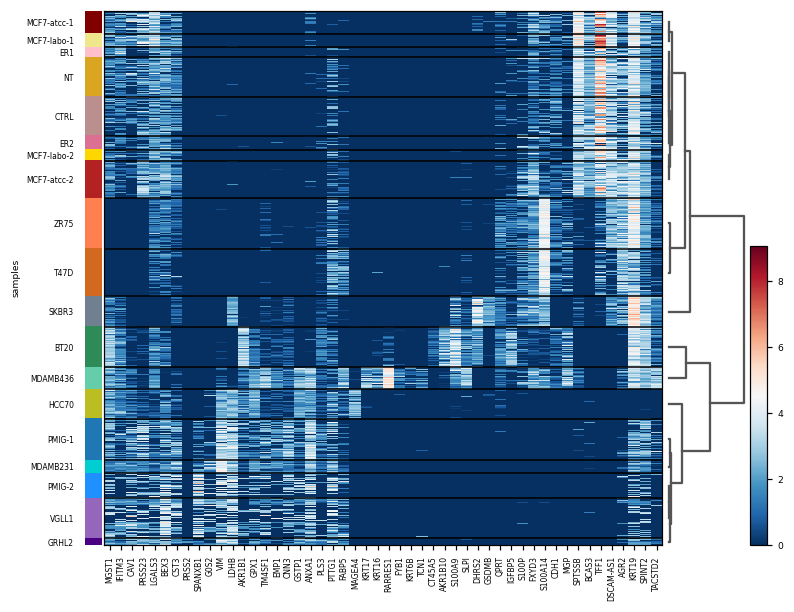

In [840]:
scanpy.pl.heatmap(sc, var_names=markers_ordered, groupby="samples", cmap = "RdBu_r", dendrogram=True, show_gene_labels=True, figsize=(8,6.5), save='_markers.pdf')

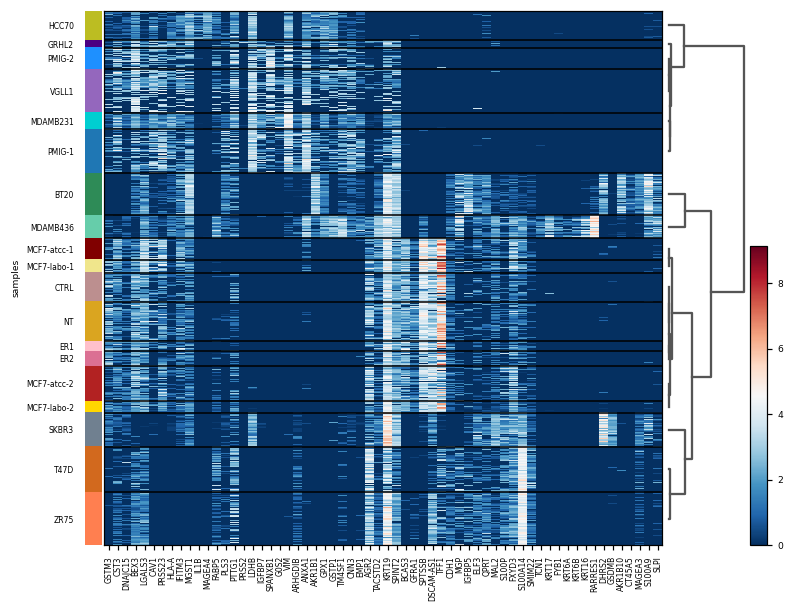

In [577]:
scanpy.pl.heatmap(sc, var_names=markers_ordered, groupby="samples", cmap = "RdBu_r", dendrogram=True, show_gene_labels=True, figsize=(8,6.5), save='_markers.pdf')

/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CB' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'samples' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a futur

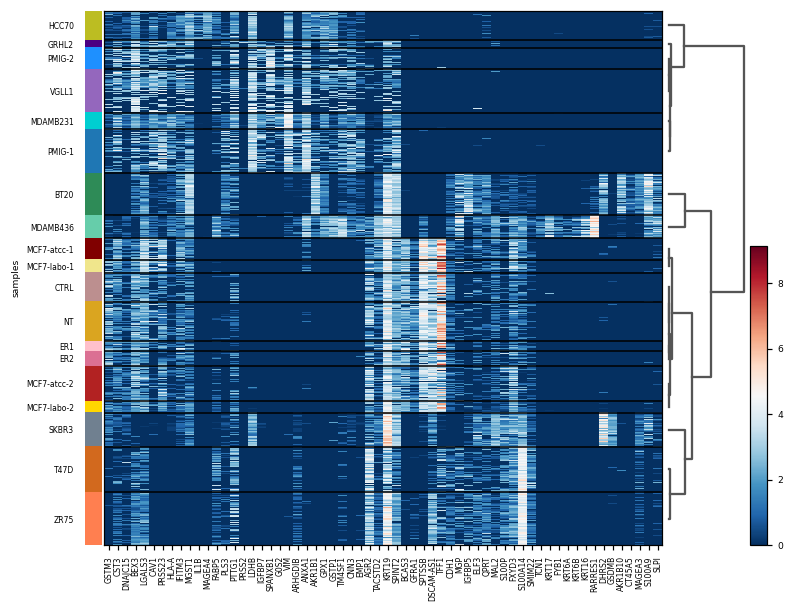

In [652]:
scanpy.pl.heatmap(sc, var_names=markers_ordered, groupby="samples", cmap = "RdBu_r", dendrogram=True, show_gene_labels=True, figsize=(8,6.5), save='_markers.pdf')

In [720]:
"CDH1" in markers

False

In [665]:
len(markers)

62

In [575]:
19*12

228

### ENRICHR

In [30]:
import scipy.stats as stats

In [841]:
sc.var_names = sc.var["external_gene_name"].tolist()
sc.obs_names_make_unique()
sc.var_names_make_unique()

In [842]:
scanpy.tl.rank_genes_groups(sc, groupby="samples", n_genes=len(sc.var_names), rankby_abs=1, method="t-test")

In [843]:
log2fcs = {}
for s in np.unique(sc.obs["samples"]):
    names = scanpy.get.rank_genes_groups_df(sc, group=s)["names"].values
    x1 = sc[sc.obs_names[sc.obs["samples"]==s],names].layers["raw"].toarray().sum(0)
    s1 = sc[sc.obs_names[sc.obs["samples"]==s],names].layers["raw"].toarray().sum()
    x1 = 1e6 * x1 / s1 
    x2 = sc[sc.obs_names[sc.obs["samples"]!=s],names].layers["raw"].toarray().sum(0)
    s2 = sc[sc.obs_names[sc.obs["samples"]!=s],names].layers["raw"].toarray().sum()
    x2 = 1e6 * x2 / s2 
    log2fcs[s] = np.log2(x1 + 1) - np.log2(x2 + 1)

/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/dea.py:158: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(log2fcs, -np.log10(qvals), s = 7, c = 'lightgray')


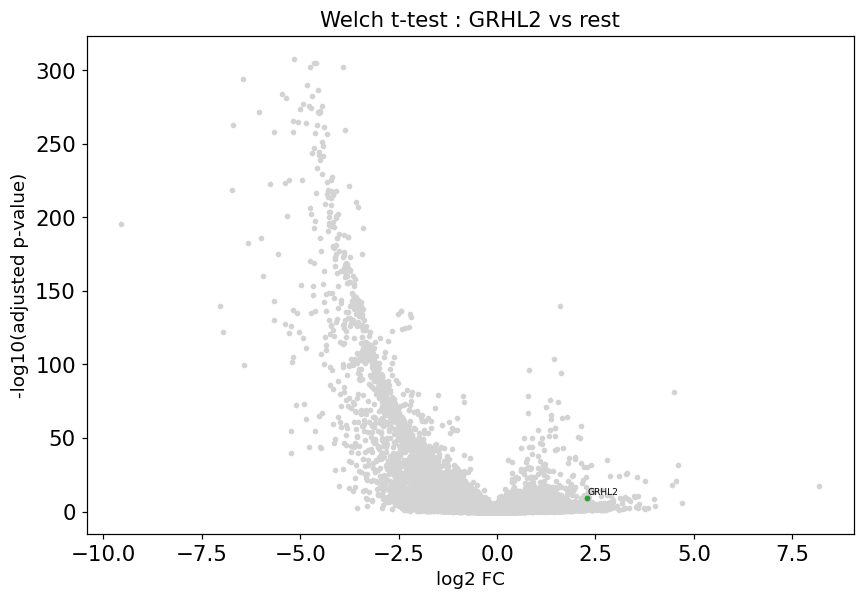

In [844]:
s = "GRHL2"
rnaseq.dea.volcano_plot(sc, group=s, top=50, show_genes=["GRHL2"], lfc=log2fcs[s])

In [ ]:
# for s in np.unique(sc.obs["samples"]) :
#     df = scanpy.get.rank_genes_groups_df(sc, group=s)
#     qvals = df["pvals_adj"].values
#     g_up = names[(log2fcs[s]>1) & (qvals < 0.05)]
#     rnaseq.dea.enrichr(sc, group=s, libraries="Cancer_Cell_Line_Encyclopedia", show = "up", lfc_cutoff_min=1, c = samples_colors[s], a=0.9, de_up=g_up)

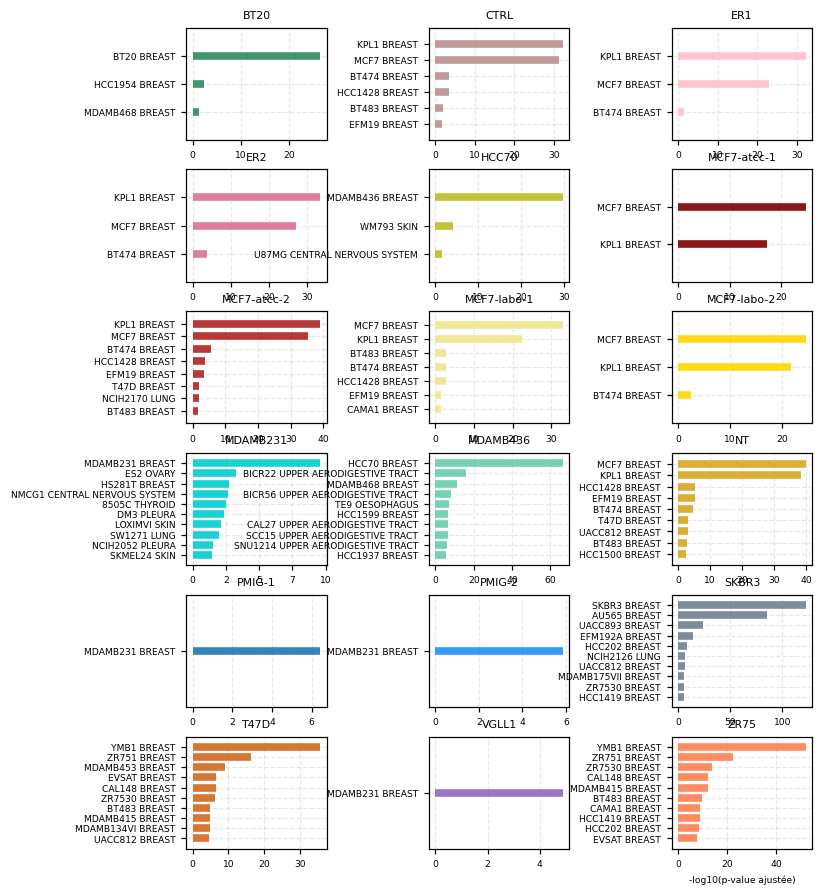

In [846]:
plt.subplots(figsize=(6.8,7.8))
i = 1
for s in np.unique(sc.obs["samples"]) :
    if s == "GRHL2" :
        continue
    axi = plt.subplot(6,3,i)
    df = scanpy.get.rank_genes_groups_df(sc, group=s)
    names = df["names"]
    qvals = df["pvals_adj"].values
    g_up = names[(log2fcs[s]>1) & (qvals < 0.05)]
    rnaseq.dea.enrichr(sc, group=s, libraries="Cancer_Cell_Line_Encyclopedia", show="up", lfc_cutoff_min=1, c = samples_colors[s], a=0.9, ax = axi, lw=5, de_up = g_up)
    plt.title(s)
    if i == 3 :
        plt.tight_layout()
    i+=1

plt.xlabel("-log10(p-value ajustée)")
plt.savefig("./figs/enrichr_markers.pdf")

/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/dea.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = pd.DataFrame(np.array(data[gene_set_library])[:,1:], columns=["Term", "P-value", "Z-score", "Combined Score", "Genes", "Adjusted P-value", "Old P-value", "Old adjusted P-value"])
/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/dea.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(abs(tick)) for tick in ticks])


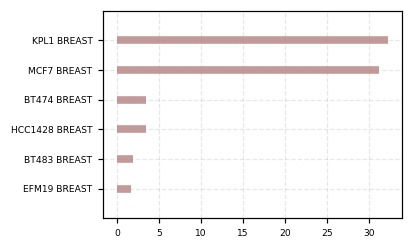

In [845]:
s = "CTRL"
df = scanpy.get.rank_genes_groups_df(sc, group=s)
names = df["names"].values
qvals = df["pvals_adj"].values
g_up = names[(log2fcs[s]>1) & (qvals < 0.05)]
# g_down = names[(log2fcs[s]<0) & (qvals < 0.01)]
rnaseq.dea.enrichr(sc, group=s, libraries="Cancer_Cell_Line_Encyclopedia", show="up", lfc_cutoff_min=1, c = samples_colors[s], a=0.9, lw=5, de_up=g_up)

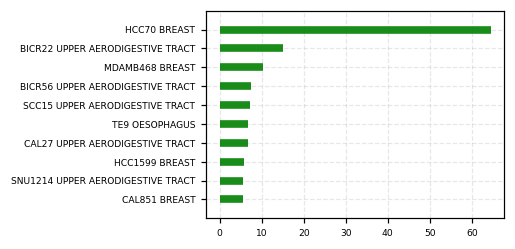

In [360]:
s = "MDAMB436"
df = scanpy.get.rank_genes_groups_df(sc, group=s)
names = df["names"].values
qvals = df["pvals_adj"].values
g_up = names[(log2fcs[s]>1) & (qvals < 0.01)]
g_down = names[(log2fcs[s]<1) & (qvals < 0.01)]
rnaseq.dea.enrichr(sc, group=s, libraries="Cancer_Cell_Line_Encyclopedia", show="both", lfc_cutoff_min=1, c = samples_colors[s], a=0.9, lw=5, de_up=g_up, de_down=g_down)

### GSEA

In [21]:
rnaseq.setup.annotate_genes(sc, 'description')

description already annotated. Set ow = True if you want to overwrite.


In [78]:
sc.obs_names_make_unique()

In [79]:
gene_exp = pd.DataFrame(sc.X.toarray().T, columns = sc.obs_names)
class_vector = (sc.obs["samples"].values == 'BT20').astype(str)
class_vector = np.where(class_vector == 'True', "cluster", class_vector) 
class_vector = np.where(class_vector == 'False', "rest", class_vector) 

In [80]:
idx = np.argsort(class_vector)
gene_exp = gene_exp[gene_exp.columns[idx]]
gene_exp.insert(0, "DESCRIPTION", sc.var["description"].values, True)
gene_exp.insert(0, "NAME", sc.var["external_gene_name"].values, True)

class_vector = list(class_vector[idx])

In [ ]:
gs_res = gp.gsea(gene_exp, # ordata='./P53_resampling_data.txt'
                 'Cancer_Cell_Line_Encyclopedia', # enrichr library names
                  class_vector,
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=1, # 100 reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=35, 
                 seed= 7,
                 format='png')

2021-12-17 07:00:45,385 Warning: dropping duplicated gene names, only keep the first values


In [283]:
res = gs_res.res2d.sort_values(by='nes', ascending=False)
res = res.loc[res.index[(res['fdr'].values < 0.05) & (res['pval'].values < 0.05)]]

In [ ]:
res

### Correlation with bulk

In [125]:
# sc = anndata.read_h5ad("/home/arion/davidm/Data/datasets/processed/Projects/scBC-Analysis/norm/all-samples-normalized.h5ad")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [896]:
sc = rnaseq.readwrite.read_filtered(samples = "all")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [957]:
rnaseq.setup.load_layer(sc, "raw")
pseudobulk = rnaseq.utils.pseudobulk(sc, group_by_annot_name="samples")
rnaseq.pp.log_norm(pseudobulk, tot = 1e6)

/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Using BioMart Ensembl Genes 100 hsapiens_gene_ensembl for gene annotations.
Normalization by total UMIs...
This is CPM normalization.
Log2 + 1 tranformation...


In [116]:
# mcf7 = rnaseq.readwrite.read_raw(data_path ="/home/arion/davidm/Data/datasets/raw/private/RNA-seq", project_id = "dsp356", exp="bulk", quant_tool = "salmon", genref = genref, samples = "Sample_E-1", quant_params = "raw-reads/pc-decoys-k31-1.4.0", cdna = "full length")
# rnaseq.setup.annotate_samples(mcf7, samples_annot_name="samples", samples_annot="MCF7-labo_E-1",ow=True)
# annot_path = "/home/arion/davidm/Data/references/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34"
# rnaseq.setup.annotate_genes(mcf7, genes_annot_name = "exonic_length", compute_length = {"start" : "exon_chrom_start", "stop" : "exon_chrom_end"}, save_path = annot_path + "/biomart_ens100", ow=True)
# rnaseq.pp.log_norm(mcf7, tot = 1e6)

# t47d = rnaseq.readwrite.read_raw(data_path ="/home/arion/davidm/Data/datasets/raw/private/RNA-seq", exp="bulk", project_id = "old/bulk-T47D_DSP280", quant_tool = "salmon", genref = genref, quant_params = "raw-reads/pc-decoys-k31-1.4.0", samples = "NI_E2", cdna = "full length")
# rnaseq.setup.annotate_samples(t47d, samples_annot_name="samples", samples_annot="T47D-labo_NI_E2", ow=True)
# annot_path = "/home/arion/davidm/Data/references/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34"
# rnaseq.setup.annotate_genes(t47d, genes_annot_na= "exonic_length", compute_length = {"start" : "exon_chrom_start", "stop" : "exon_chrom_end"}, save_path = annot_path + "/biomart_ens100", ow=True)
# rnaseq.pp.log_norm(t47d, tot = 1e6)

/home/arion/davidm/Data/datasets/raw/private/RNA-seq/bulk/dsp356/quant/salmon/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/raw-reads/pc-decoys-k31-1.4.0


/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Using BioMart Ensembl Genes 100 hsapiens_gene_ensembl for gene annotations.
Annotating samples...
Annotating exonic_length using /home/arion/davidm/Data/references/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/biomart_ens100/ensembl_gene_id-to-exonic_length.csv...
Normalization by total UMIs...
This is TPM normalization.
Log2 + 1 tranformation...
/home/arion/davidm/Data/datasets/raw/private/RNA-seq/bulk/old/bulk-T47D_DSP280/quant/salmon/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/raw-reads/pc-decoys-k31-1.4.0
Using BioMart Ensembl Genes 100 hsapiens_gene_ensembl for gene annotations.
Annotating samples...
Annotating exonic_length using /home/arion/davidm/Data/references/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/biomart_ens100/ensembl_gene_id-to-exonic_length.csv...
Normalization by total UMIs...
This is TPM normalization.
Log2 + 1 tranformation...


In [992]:
panel = rnaseq.readwrite.read_raw(data_path="/home/arion/davidm/Data/datasets/raw/public/RNA-seq", exp = "bulk", project_id="BC-Cell-Lines-Panel_GSE48213", quant_tool = "salmon", genref = genref, quant_params = "raw/pc-decoys-k31-1.4.0", samples = "all", layer = "raw", cdna = "full length")
annot_path = "/home/arion/davidm/Data/references/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34"
# rnaseq.pp.filter_genes(panel, n_counts=1, n_samples=56)
rnaseq.setup.annotate_genes(panel, genes_annot_name = "exonic_length", compute_length = {"start" : "exon_chrom_start", "stop" : "exon_chrom_end"}, save_path = annot_path + "/biomart_ens100", ow=True)

/home/arion/davidm/Data/datasets/raw/public/RNA-seq/bulk/BC-Cell-Lines-Panel_GSE48213/quant/salmon/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/raw/pc-decoys-k31-1.4.0


/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Using BioMart Ensembl Genes 100 hsapiens_gene_ensembl for gene annotations.
Annotating exonic_length using /home/arion/davidm/Data/references/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/biomart_ens100/ensembl_gene_id-to-exonic_length.csv...


In [928]:
for s in np.unique(panel.obs["samples"].values) :
    l = panel.X.toarray().sum(1)[panel.obs["samples"].values == s]
    print(f"{s} : {l}")

184A1 : [23289608.]
184B5 : [21052432.]
21MT1 : [20935012.]
21MT2 : [23809650.]
21NT : [25074264.]
21PT : [26832020.]
600MPE : [11023644.]
AU565 : [27465524.]
BT474 : [18873572.]
BT483 : [23473814.]
BT549 : [25878038.]
CAMA1 : [21693810.]
EFM192A : [23993468.]
EFM192B : [22682604.]
EFM192C : [22090094.]
HCC1143 : [16246726.]
HCC1395 : [18382320.]
HCC1419 : [20592416.]
HCC1428 : [17677984.]
HCC1569 : [27239542.]
HCC1599 : [17568234.]
HCC1806 : [16797948.]
HCC1937 : [16236387.]
HCC1954 : [24471384.]
HCC202 : [20689118.]
HCC2218 : [40575388.]
HCC3153 : [23867168.]
HCC38 : [23326900.]
HCC70 : [27227840.]
HS578T : [21416880.]
JIMT1 : [18306534.]
LY2 : [26093998.]
MB157 : [18963588.]
MCF10A : [23958894.]
MCF10F : [21603612.]
MCF12A : [32581980.]
MCF7 : [22956770.]
MDAMB134VI : [21436964.]
MDAMB175VII : [34207012.]
MDAMB231 : [26584832.]
MDAMB361 : [22802312.]
MDAMB453 : [32838150.]
MX1 : [17734058.]
SKBR3 : [20161570.]
SUM1315MO2 : [28163376.]
SUM149PT : [28327128.]
SUM225CWN : [46305040.]
S

In [959]:
for s in np.unique(panel.obs["samples"].values) :
    l = (panel.X.toarray()==0).sum(1)[panel.obs["samples"].values == s]
    print(f"{s} : {l}")

184A1 : [5311]
184B5 : [5374]
21MT1 : [4753]
21MT2 : [4486]
21NT : [4379]
21PT : [4615]
600MPE : [4674]
AU565 : [4840]
BT474 : [4844]
BT483 : [4278]
BT549 : [5821]
CAMA1 : [5088]
EFM192A : [4787]
EFM192B : [4239]
EFM192C : [4830]
HCC1143 : [4393]
HCC1395 : [2645]
HCC1419 : [4553]
HCC1428 : [4155]
HCC1569 : [4935]
HCC1599 : [4254]
HCC1806 : [4556]
HCC1937 : [4047]
HCC1954 : [4918]
HCC202 : [619]
HCC2218 : [4567]
HCC3153 : [4937]
HCC38 : [4427]
HCC70 : [4986]
HS578T : [3624]
JIMT1 : [5176]
LY2 : [4809]
MB157 : [5015]
MCF10A : [5772]
MCF10F : [5376]
MCF12A : [4592]
MCF7 : [4725]
MDAMB134VI : [4068]
MDAMB175VII : [3791]
MDAMB231 : [5667]
MDAMB361 : [4294]
MDAMB453 : [5169]
MX1 : [4769]
SKBR3 : [6683]
SUM1315MO2 : [4249]
SUM149PT : [4186]
SUM225CWN : [5179]
SUM229PE : [5067]
SUM52PE : [5136]
T47D : [5140]
T47D_Kbluc : [5015]
UACC812 : [4207]
UACC893 : [5229]
ZR751 : [5204]
ZR7530 : [4970]
ZR75B : [5029]


In [930]:
# l = np.min(panel.X.toarray().sum(1))
# scanpy.pp.downsample_counts(panel, np.repeat(l, panel.shape[0]))

In [993]:
rnaseq.pp.log_norm(panel, tot = 1e6)

rnaseq.setup.annotate_genes(panel)
panel.var_names = panel.var["external_gene_name"].tolist()

Normalization by total UMIs...
This is TPM normalization.
Log2 + 1 tranformation...
Annotating external_gene_name using Biomart (Ensembl Genes 100, 'hsapiens_gene_ensembl')...


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb5a9acc910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb52e996400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb5a9acc700>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb52e996b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb52e996f10>],
 'means': []}

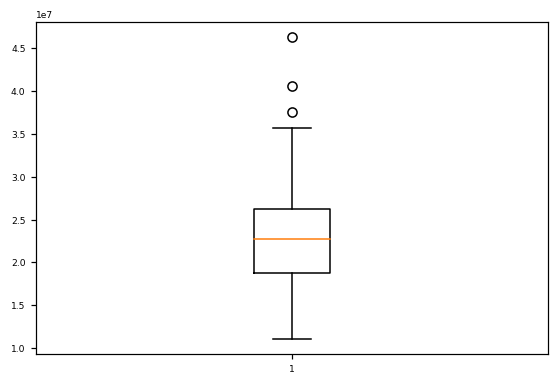

In [929]:
plt.boxplot(panel.X.toarray().sum(1))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb532929a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb532929250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb532929b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb53525a940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb536234a60>],
 'means': []}

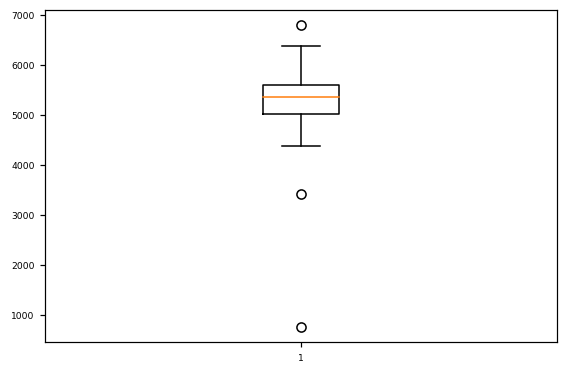

In [935]:
plt.boxplot((panel.X.toarray()==0).sum(1))

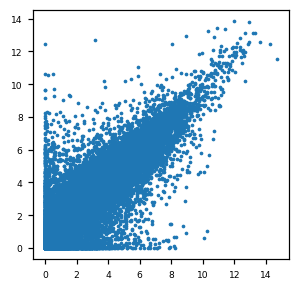

In [975]:
plt.subplots(figsize=(3,3))
x = panel.X.toarray()[panel.obs["samples"].values == "21MT1"]
y = panel.X.toarray()[panel.obs["samples"].values == "MX1"]
plt.scatter(x,y, s=2)

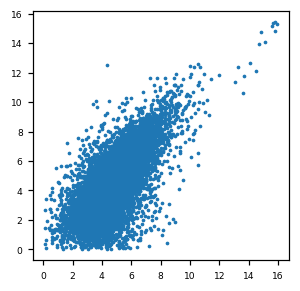

In [994]:
plt.subplots(figsize=(3,3))
x = panel.X.toarray()[panel.obs["samples"].values == "HCC202"]
y = panel.X.toarray()[panel.obs["samples"].values == "MX1"]
plt.scatter(x,y, s=2)

In [991]:
panel.var[((x<6) & (y >12)).ravel()]

ensembl_gene_id  exonic_length external_gene_name
SOD2    ENSG00000112096          23894               SOD2
FDCSP   ENSG00000181617            508              FDCSP
SAA1    ENSG00000173432           1498               SAA1
IFITM3  ENSG00000142089           1932             IFITM3

In [972]:
panel.var["external_gene_name"]

ensembl_gene_id  exonic_length external_gene_name
MT-CYB   ENSG00000198727           1140             MT-CYB
MT-ND5   ENSG00000198786           1811             MT-ND5
MT-ND4   ENSG00000198886           1377             MT-ND4
MT-ATP8  ENSG00000228253            206            MT-ATP8
MT-CO1   ENSG00000198804           1541             MT-CO1
...                  ...            ...                ...
SLC7A5   ENSG00000103257           5195             SLC7A5
CENPVL2  ENSG00000283093           1619            CENPVL2
CA5A     ENSG00000174990           3582               CA5A
ZFYVE27  ENSG00000155256           9157            ZFYVE27
BANP     ENSG00000172530          12992               BANP

[20305 rows x 3 columns]

In [995]:
pseudobulk.obs_names_make_unique()
pseudobulk.var_names_make_unique()
panel.obs_names_make_unique()
panel.var_names_make_unique()

data = anndata.concat([panel, pseudobulk], label = "exp_type", keys = ["bulk", "sc"], axis=0) #["bulk", "bulk-lab-mcf7","bulk-lab-t47d", "sc"])
# data._inplace_subset_obs(data.obs["samples"] != "HCC202")
# rnaseq.pp.filter_genes(data)
data._inplace_subset_var(panel.X.toarray().sum(0)>0)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [996]:
# i_bulk = [s in ["bulk", "bulk-lab-mcf7","bulk-lab-t47d"] for s in data.obs["exp_type"]]
i_bulk = data.obs["exp_type"] == "bulk"
i_sc = data.obs["exp_type"] == "sc"

corr = pd.DataFrame(np.corrcoef(data.X.toarray()))

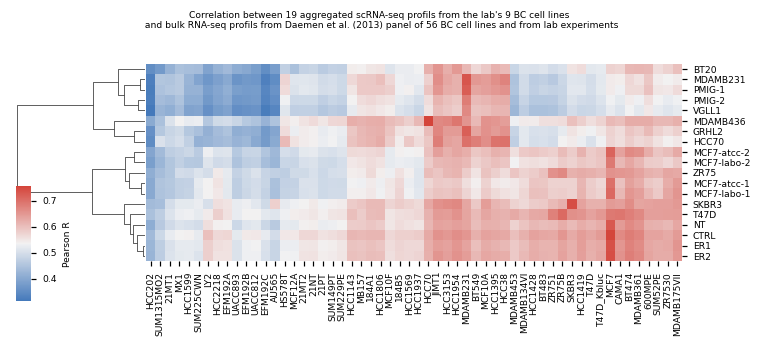

In [997]:
x = corr.values[i_sc]
x = x[:,i_bulk]

df = pd.DataFrame(x, index = data.obs["samples"].values[i_sc], columns = data.obs["samples"].values[i_bulk])

cmap = sb.diverging_palette(250, 14, as_cmap=True)
g = sb.clustermap(df, cmap=cmap, cbar_pos=(0.02, 0.1, 0.02, 0.35), cbar_kws={'label': 'Pearson R'}, method='ward',figsize=(6.9,3))
#g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

g.ax_heatmap.set(xticks=np.arange(0.5,i_bulk.sum()))
g.ax_heatmap.set_xticklabels(df.columns[g.dendrogram_col.reordered_ind], fontsize = 6)

g.ax_heatmap.set(yticks=np.arange(0.5,i_sc.sum()))
g.ax_heatmap.set_yticklabels(df.index[g.dendrogram_row.reordered_ind], fontsize = 6)

# for r in row_label :
#     wanted_row = np.argwhere(df.index[g.dendrogram_row.reordered_ind] == r)
#     x, y, w, h  = (0, wanted_row, len(df.columns), 1)
#     g.ax_heatmap.add_patch(Rectangle((x, y), w, h, fill=False, edgecolor=b["T47D"], lw=3, clip_on=False))
#     g.ax_heatmap.tick_params(length=0)


# for c in col_label :
#     wanted_col = np.argwhere(df.columns[g.dendrogram_col.reordered_ind] == c)
#     x, y, w, h = (wanted_col, 0, 1, len(df.index))
#     g.ax_heatmap.add_patch(Rectangle((x, y), w, h, fill=False, edgecolor=b["T47D"], lw=3, clip_on=False))
#     g.ax_heatmap.tick_params(length=0)
                                      
                                      
plt.suptitle("Correlation between 19 aggregated scRNA-seq profils from the lab's 9 BC cell lines \n and bulk RNA-seq profils from Daemen et al. (2013) panel of 56 BC cell lines and from lab experiments", fontsize=6)
plt.savefig("./figs/corr_sc-bulk.pdf");

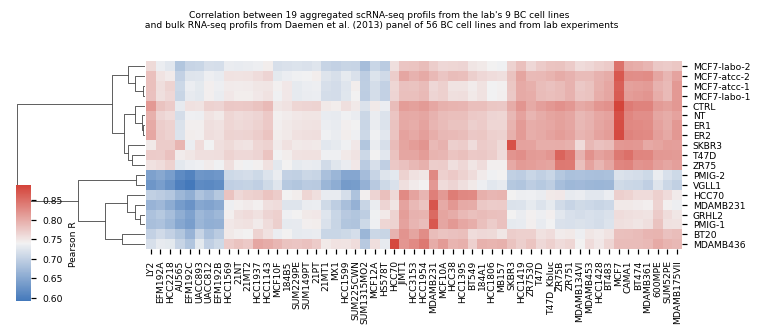

In [895]:
x = corr.values[i_sc]
x = x[:,i_bulk]

df = pd.DataFrame(x, index = data.obs["samples"].values[i_sc], columns = data.obs["samples"].values[i_bulk])

cmap = sb.diverging_palette(250, 14, as_cmap=True)
g = sb.clustermap(df, cmap=cmap, cbar_pos=(0.02, 0.1, 0.02, 0.35), cbar_kws={'label': 'Pearson R'}, method='ward',figsize=(6.9,3))
#g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

g.ax_heatmap.set(xticks=np.arange(0.5,i_bulk.sum()))
g.ax_heatmap.set_xticklabels(df.columns[g.dendrogram_col.reordered_ind], fontsize = 6)

g.ax_heatmap.set(yticks=np.arange(0.5,i_sc.sum()))
g.ax_heatmap.set_yticklabels(df.index[g.dendrogram_row.reordered_ind], fontsize = 6)

# for r in row_label :
#     wanted_row = np.argwhere(df.index[g.dendrogram_row.reordered_ind] == r)
#     x, y, w, h  = (0, wanted_row, len(df.columns), 1)
#     g.ax_heatmap.add_patch(Rectangle((x, y), w, h, fill=False, edgecolor=b["T47D"], lw=3, clip_on=False))
#     g.ax_heatmap.tick_params(length=0)


# for c in col_label :
#     wanted_col = np.argwhere(df.columns[g.dendrogram_col.reordered_ind] == c)
#     x, y, w, h = (wanted_col, 0, 1, len(df.index))
#     g.ax_heatmap.add_patch(Rectangle((x, y), w, h, fill=False, edgecolor=b["T47D"], lw=3, clip_on=False))
#     g.ax_heatmap.tick_params(length=0)
                                      
                                      
plt.suptitle("Correlation between 19 aggregated scRNA-seq profils from the lab's 9 BC cell lines \n and bulk RNA-seq profils from Daemen et al. (2013) panel of 56 BC cell lines and from lab experiments", fontsize=6)
plt.savefig("./figs/corr_sc-bulk.pdf");

### siRNAs

In [167]:
sc = rnaseq.readwrite.read_filtered(samples = "all")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [168]:
sc.obs_names_make_unique()

In [169]:
np.unique(sc.obs["samples"])

array(['BT20', 'CTRL', 'ER1', 'ER2', 'GRHL2', 'HCC70', 'MCF7-atcc-1',
       'MCF7-atcc-2', 'MCF7-labo-1', 'MCF7-labo-2', 'MDAMB231',
       'MDAMB436', 'NT', 'PMIG-1', 'PMIG-2', 'SKBR3', 'T47D', 'VGLL1',
       'ZR75'], dtype=object)

In [170]:
samples = ['CTRL', 'ER1', 'ER2', 'NT']

sc._inplace_subset_obs([s in samples for s in sc.obs["samples"]])

In [171]:
rnaseq.pp.filter_genes(sc, n_counts=1, n_samples=5)

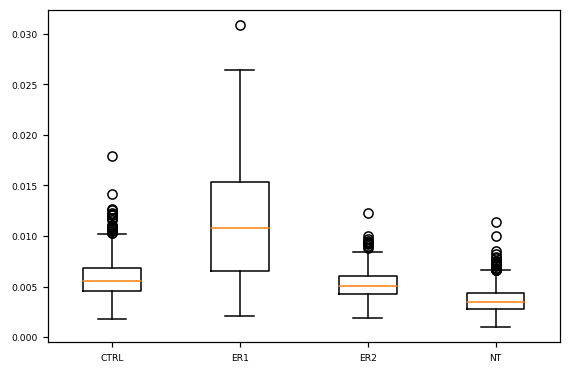

In [13]:
plt.boxplot([sc.obs.loc[sc.obs_names[sc.obs["samples"] == s]]["processed_pseudogene"] for s in np.unique(sc.obs["samples"])], labels=np.unique(sc.obs["samples"]));

In [39]:
scanpy.pp.highly_variable_genes(sc, n_top_genes=500)

Normalization by total UMIs...
Log2 + 1 tranformation...


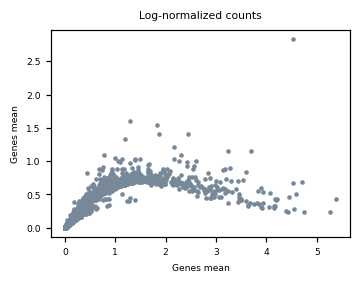

In [172]:
# tot=sc.obs["total_UMIs"].mean() - sc.obs["total_UMIs"].median()
rnaseq.pp.log_norm(sc, plot=True, inplace=True, ow = True, verbose = True)

scanpy.tl.pca(sc, use_highly_variable=0)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

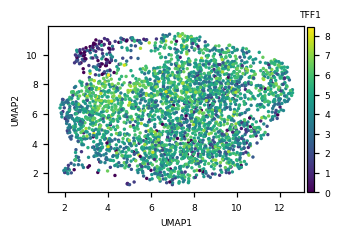

In [175]:
g = "TFF1"
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var["external_gene_name"]==g], \
    s = 5, palette = "viridis", xlabel="UMAP1", ylabel="UMAP2", color_title = g, linewidth=0, figsize=(3,2), save="./figs/tff1_sirnas.pdf")

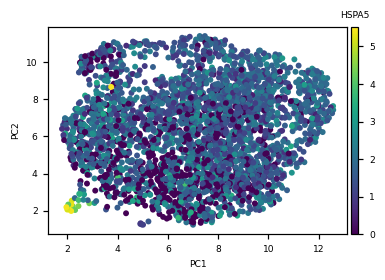

In [46]:
g = "HSPA5"
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var["external_gene_name"]==g], \
    s = 15, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = g, linewidth=0, save="./figs/hspa5_sirnas.pdf")

In [ ]:
sc.var_names = sc.var["external_gene_name"].values
sc.var_names = np.array(sc.var_names.values)
sc.var_names_make_unique()
scanpy.tl.score_genes_cell_cycle(sc, s_genes=s_genes, g2m_genes=g2m_genes)

scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["G2M_score"],\
    s = 15, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

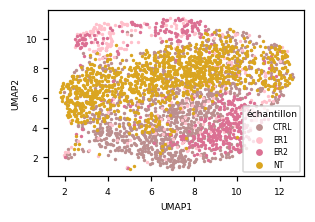

In [177]:
rnaseq.setup.shuffle(sc)
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=2,\
    s = 5, palette = samples_colors, xlabel="UMAP1", ylabel="UMAP2", color_title = "échantillon", linewidth=0, figsize=(3,2), save="./figs/samples_sirnas.pdf")

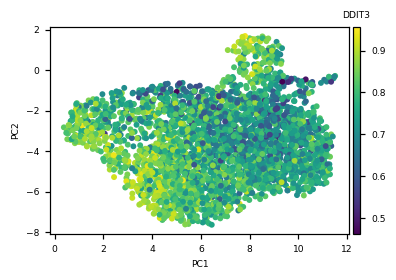

In [50]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["max_corr"], \
    s = 15, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = g, linewidth=0)

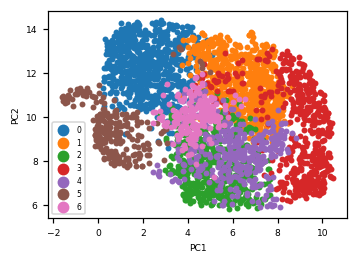

In [35]:
scanpy.tl.leiden(sc, resolution=0.7)
# from sklearn.cluster import KMeans

# km = KMeans(5)
# clusters = km.fit_predict(sc.obsm["X_pca"])

clusters = sc.obs["leiden"]

rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = clusters, \
    s = 15, palette = "viridis", xlabel="PC1", ylabel="PC2", linewidth=0)

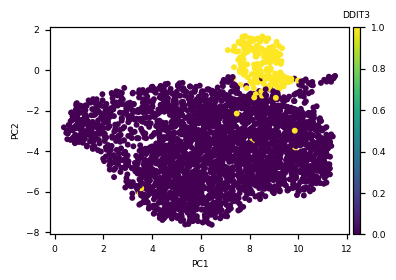

In [60]:
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["leiden"]=='8', \
    s = 15, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = g, linewidth=0)

In [80]:
log2fcs = {}
for s in np.unique(sc.obs["leiden"]):
    x1 = sc[sc.obs_names[sc.obs["leiden"]==s],:].layers["raw"].toarray().sum(0)
#     f1 = np.median(sc[sc.obs_names[sc.obs["leiden"]==s],:].layers["raw"].toarray().sum(1))
    s1 = x1.sum()
    x1 = 1e6 * x1 / s1 
    x2 = sc[sc.obs_names[sc.obs["leiden"]!=s],:].layers["raw"].toarray().sum(0)
#     f2 = np.median(sc[sc.obs_names[sc.obs["leiden"]!=s],:].layers["raw"].toarray().sum(1))
    s2 = x2.sum()
    x2 = 1e6 * x2 / s2 
    log2fcs[s] = np.log2(x1 + 1) - np.log2(x2 + 1)

In [67]:
scanpy.tl.rank_genes_groups(sc, groupby="leiden", n_genes=len(sc.var_names), rankby_abs=1, method="t-test")

/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CB' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'samples' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a futur

In [56]:
df = scanpy.get.rank_genes_groups_df(sc, group='8')
df.index = df["names"]
pvals = df.loc[sc.var_names]["pvals_adj"].values

In [63]:
sc.var_names[(log2fcs[s]>3) & (pvals <0.05)]

Index([], dtype='object')

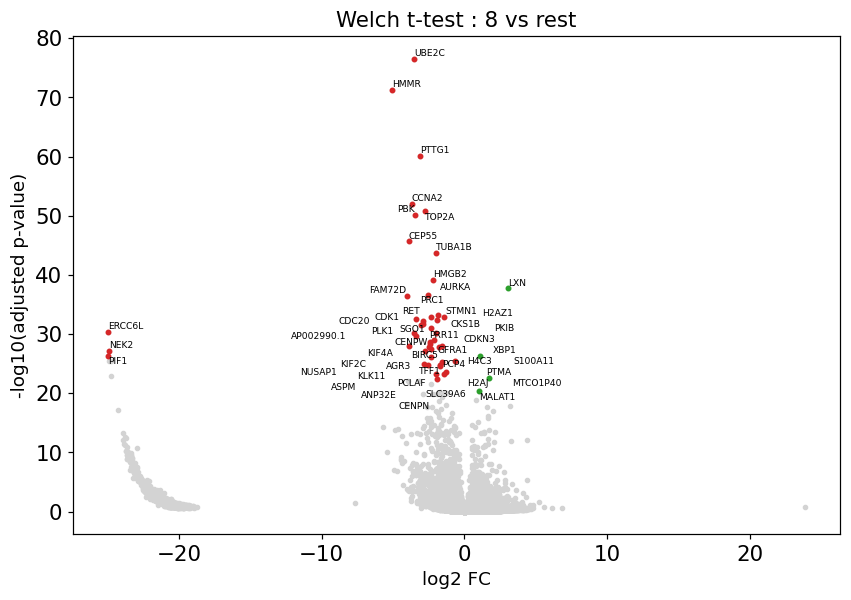

In [69]:
s = "8"
rnaseq.dea.volcano_plot(sc, group=s, top=50)

/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/dea.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = pd.DataFrame(np.array(data[gene_set_library])[:,1:], columns=["Term", "P-value", "Z-score", "Combined Score", "Genes", "Adjusted P-value", "Old P-value", "Old adjusted P-value"])
/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/dea.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(abs(tick)) for tick in ticks])


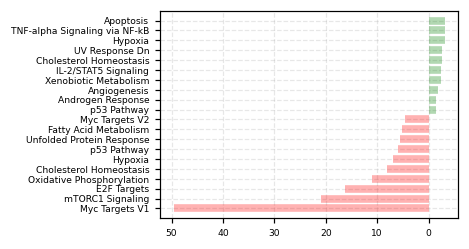

In [81]:
s = "8"
rnaseq.dea.enrichr(sc, group=s, libraries="MSigDB_Hallmark_2020", lfc_cutoff_min=1, a=0.3, lw=5)

In [ ]:
rnaseq.dea.enrichr()

In [1092]:
scanpy.pp.neighbors(sc,use_rep="X_pca")
scanpy.tl.leiden(sc, resolution=0.2)

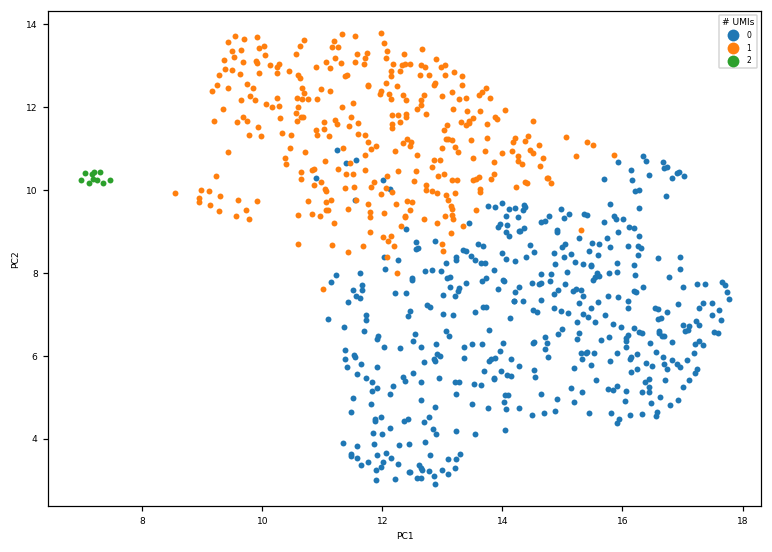

In [1093]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["leiden"], markerscale=2,\
    s = 15, xlabel="PC1", ylabel="PC2", color_title = "# UMIs", linewidth=0, fig=scatt)
plt.tight_layout()

In [1086]:
sc._inplace_subset_obs(sc.obs["leiden"]=='9')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [107]:
rnaseq.setup.annotate_genes(sc, 'description')

description already annotated. Set ow = True if you want to overwrite.


In [108]:
gene_exp = pd.DataFrame(sc.X.toarray().T, columns = sc.obs_names)
class_vector = (sc.obs["leiden"].values == '8').astype(str)

class_vector = np.where(class_vector == 'True', "cluster", class_vector) 
class_vector = np.where(class_vector == 'False', "rest", class_vector) 

In [109]:
idx = np.argsort(class_vector)
gene_exp = gene_exp[gene_exp.columns[idx]]
gene_exp.insert(0, "DESCRIPTION", sc.var["description"].values, True)
gene_exp.insert(0, "NAME", sc.var["external_gene_name"].values, True)

class_vector = list(class_vector[idx])

In [110]:
len(class_vector)

3089

In [111]:
gene_exp.shape[1]

3091

In [ ]:
gs_res = gp.gsea(gene_exp, # ordata='./P53_resampling_data.txt'
                 'MSigDB_Hallmark_2020', # enrichr library names
                  class_vector,
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=100, # 100 reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=8, 
                 seed= 7,
                 format='png')

2022-01-31 06:03:16,436 Warning: dropping duplicated gene names, only keep the first values


In [ ]:
res = gs_res.res2d.sort_values(by='nes', ascending=False)
res = res.loc[res.index[(res['fdr'].values < 0.05) & (res['pval'].values < 0.05)]]

In [98]:
res

es       nes      pval       fdr  \
Term                                                                        
TNF-alpha Signaling via NF-kB      0.525857  2.635498  0.000000  0.000000   
UV Response Dn                     0.474952  2.379545  0.000000  0.000000   
Angiogenesis                       0.601098  2.283202  0.000000  0.000000   
Myogenesis                         0.436515  2.165726  0.000000  0.000000   
p53 Pathway                        0.413357  2.150584  0.000000  0.000000   
Hypoxia                            0.370274  2.052820  0.000000  0.000000   
TGF-beta Signaling                 0.498150  1.997211  0.000000  0.000000   
IL-6/JAK/STAT3 Signaling           0.448380  1.993153  0.000000  0.000000   
Cholesterol Homeostasis            0.430044  1.923508  0.000000  0.003676   
Interferon Alpha Response          0.446387  1.909464  0.000000  0.003308   
Inflammatory Response              0.412725  1.854227  0.000000  0.009023   
Hedgehog Signaling                 0.575638  1.817790  0.000000  0.008271   
Apoptosis                          0.372689  1.801403  0.000000  0.007635   
Xenobiotic Metabolism              0.363710  1.798594  0.000000  0.007089   
Apical Junction                    0.365135  1.796645  0.000000  0.006617   
KRAS Signaling Up                  0.392380  1.764342  0.000000  0.006203   
Apical Surface                     0.455847  1.751460  0.000000  0.005838   
Reactive Oxygen Species Pathway    0.418478  1.682821  0.000000  0.007352   
Protein Secretion                  0.345770  1.651001  0.000000  0.010448   
heme Metabolism                    0.293330  1.632853  0.000000  0.009925   
Bile Acid Metabolism               0.358240  1.606588  0.000000  0.012604   
Notch Signaling                    0.442093  1.571162  0.000000  0.019550   
IL-2/STAT5 Signaling               0.313309  1.568383  0.000000  0.018700   
Androgen Response                  0.335592  1.514236  0.000000  0.027570   
Adipogenesis                       0.292461  1.497620  0.000000  0.030539   
Epithelial Mesenchymal Transition  0.303631  1.494127  0.000000  0.029408   
Complement                         0.319950  1.491707  0.000000  0.029540   
Fatty Acid Metabolism             -0.322141 -1.526046  0.035714  0.021244   
UV Response Up                    -0.321346 -1.548317  0.000000  0.019218   
Glycolysis                        -0.354088 -1.690163  0.000000  0.002974   
Spermatogenesis                   -0.541423 -2.204630  0.000000  0.000000   
Mitotic Spindle                   -0.453274 -2.306988  0.000000  0.000000   
DNA Repair                        -0.471499 -2.315570  0.000000  0.000000   
Unfolded Protein Response         -0.518576 -2.421306  0.000000  0.000000   
Myc Targets V2                    -0.683449 -2.705252  0.000000  0.000000   
Estrogen Response Early           -0.547199 -2.867096  0.000000  0.000000   
mTORC1 Signaling                  -0.535075 -2.967263  0.000000  0.000000   
Estrogen Response Late            -0.649202 -3.290931  0.000000  0.000000   
E2F Targets                       -0.828019 -3.425003  0.000000  0.000000   
Myc Targets V1                    -0.774116 -3.706216  0.000000  0.000000   
G2-M Checkpoint                   -0.811456 -3.785886  0.000000  0.000000   

                                   geneset_size  matched_size  \
Term                                                            
TNF-alpha Signaling via NF-kB               200           156   
UV Response Dn                              144           121   
Angiogenesis                                 36            20   
Myogenesis                                  200           121   
p53 Pathway                                 200           181   
Hypoxia                                     200           164   
TGF-beta Signaling                           54            48   
IL-6/JAK/STAT3 Signaling                     87            48   
Cholesterol Homeostasis                      74            66   
Interferon Alp

### Median normalization

In [167]:
sc = anndata.read_h5ad("/home/arion/davidm/Data/datasets/processed/Projects/scBC-Analysis/norm/all-samples-normalized.h5ad")

sc._inplace_subset_obs(sc.obs["samples"]=="NT")
rnaseq.setup.load_layer(sc, "raw")
rnaseq.setup.annotate_samples(sc, samples_annot_name = "total_UMIs", samples_annot = sc.X.toarray().sum(1).ravel(), ow=True)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Annotating total_UMIs...


Normalization by total UMIs...
Log2 + 1 tranformation...


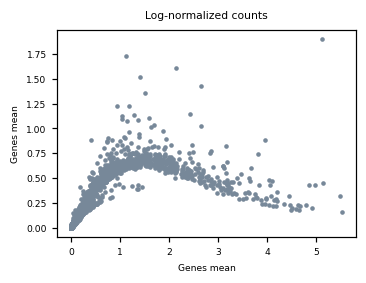

In [168]:
rnaseq.pp.log_norm(sc, plot=True, inplace=True, verbose = True)
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

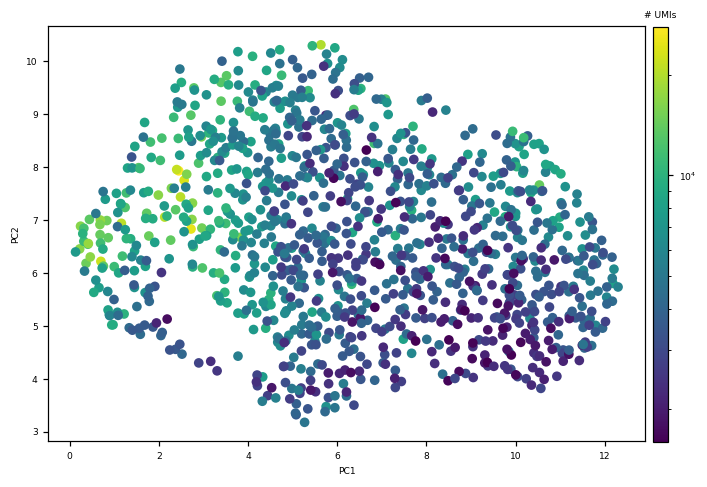

In [169]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["total_UMIs"], norm = LogNorm(),\
    s = 40, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

### Downsampling to normalize

In [161]:
sc = anndata.read_h5ad("/home/arion/davidm/Data/datasets/processed/Projects/scBC-Analysis/norm/all-samples-normalized.h5ad")

sc._inplace_subset_obs(sc.obs["samples"]=="NT")
rnaseq.setup.load_layer(sc, "raw")
rnaseq.setup.annotate_samples(sc, samples_annot_name = "total_UMIs", samples_annot = sc.X.toarray().sum(1).ravel(), ow=True)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Annotating total_UMIs...


In [162]:
libs = np.repeat(np.min(sc.obs["total_UMIs"]), len(sc.obs_names))
scanpy.pp.downsample_counts(sc, libs)
rnaseq.setup.save_layer(sc)
sc.uns["layer"] = "norm"

In [163]:
libs

array([1600., 1600., 1600., ..., 1600., 1600., 1600.], dtype=float32)

Dataset already normalized.
Log2 + 1 tranformation...


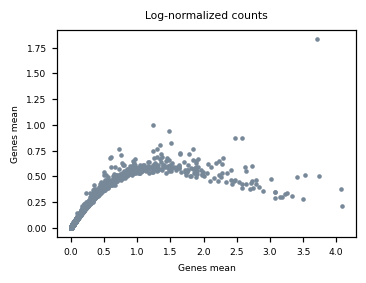

In [164]:
rnaseq.pp.log_norm(sc, plot=True, inplace=True, verbose = True)
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

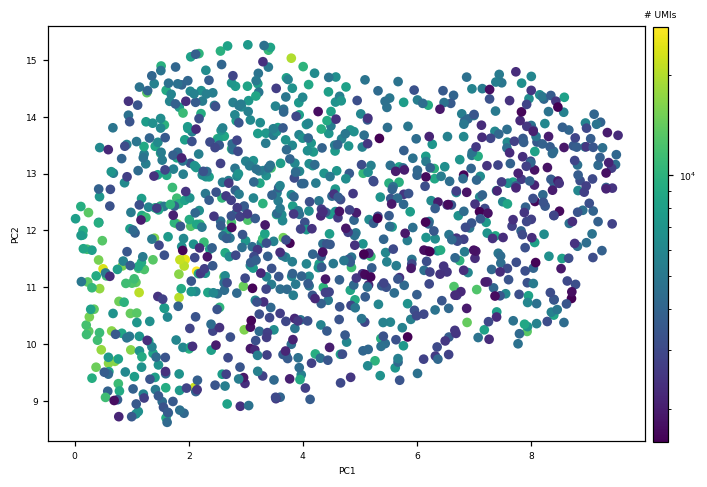

In [166]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["total_UMIs"], norm = LogNorm(),\
    s = 40, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

### Downsampling for batch effects

In [492]:
import math
import seaborn as sb

In [488]:
sc = anndata.read_h5ad("/home/arion/davidm/Data/datasets/processed/Projects/scBC-Analysis/norm/all-samples-normalized.h5ad")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [505]:
rnaseq.setup.load_layer(sc, "raw")

In [490]:
rnaseq.setup.annotate_samples(sc, samples_annot_name = "total_UMIs", samples_annot = sc.X.toarray().sum(1).ravel(), ow=True)

Annotating total_UMIs...


/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

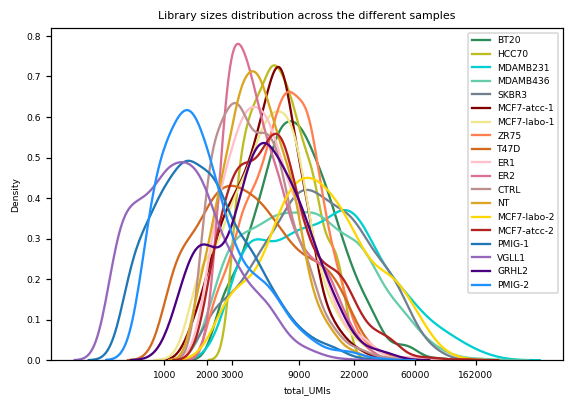

In [493]:
annot = "samples"
bins = 100
xmin = sc.obs["total_UMIs"].min()
xmax = sc.obs["total_UMIs"].max()

ticks = np.arange(np.log(xmin), np.log(xmax), 1)
labels = np.array([math.ceil(n / 1000) * 1000 for n in np.exp(ticks)])
ticks = np.log(labels)


for c,s in zip(samples_colors.values(), samples_colors.keys()):
    x = sc.obs["total_UMIs"][sc.obs[annot] == s]
    sb.distplot(np.log(x), kde=True, hist = False, label=s, color =c)
    plt.xticks(ticks = ticks, labels = labels.astype(str))

plt.legend()    
plt.title("Library sizes distribution across the different samples")
plt.show();

In [499]:
avgs = []
for s in samples_colors.keys():
    x = sc.obs["total_UMIs"][sc.obs["samples"] == s]
    avgs.append(np.mean(x))
factors = np.min(avgs) / avgs

libs = []
for s,f in zip(samples_colors.keys(), factors) :
    x = sc.obs["total_UMIs"][sc.obs["samples"] == s]
    libs.append((f * x).astype(int))
libs = np.concatenate(libs)

In [500]:
scanpy.pp.downsample_counts(sc, libs)

In [501]:
rnaseq.setup.save_layer(sc)

In [502]:
rnaseq.setup.annotate_samples(sc, samples_annot_name = "total_UMIs", samples_annot = sc.X.toarray().sum(1).ravel(), ow=True)

Annotating total_UMIs...


/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

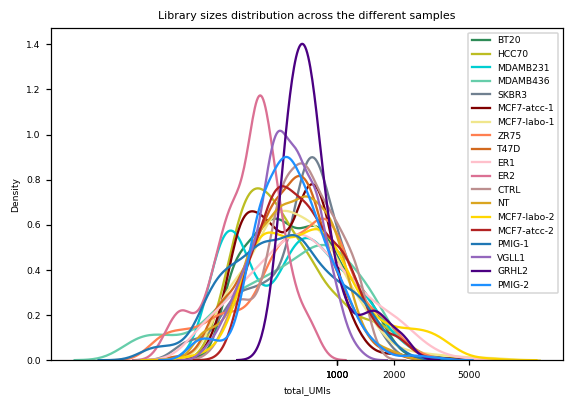

In [503]:
annot = "samples"
bins = 100
xmin = sc.obs["total_UMIs"].min()
xmax = sc.obs["total_UMIs"].max()

ticks = np.arange(np.log(xmin), np.log(xmax), 1)
labels = np.array([math.ceil(n / 1000) * 1000 for n in np.exp(ticks)])
ticks = np.log(labels)


for c,s in zip(samples_colors.values(), samples_colors.keys()):
    x = sc.obs["total_UMIs"][sc.obs[annot] == s]
    sb.distplot(np.log(x), kde=True, hist = False, label=s, color =c)
    plt.xticks(ticks = ticks, labels = labels.astype(str))

plt.legend()    
plt.title("Library sizes distribution across the different samples")
plt.show();

In [504]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)


Normalization by total UMIs...
Log2 + 1 tranformation...


In [100]:
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

Normalization by total UMIs...
Log2 + 1 tranformation...


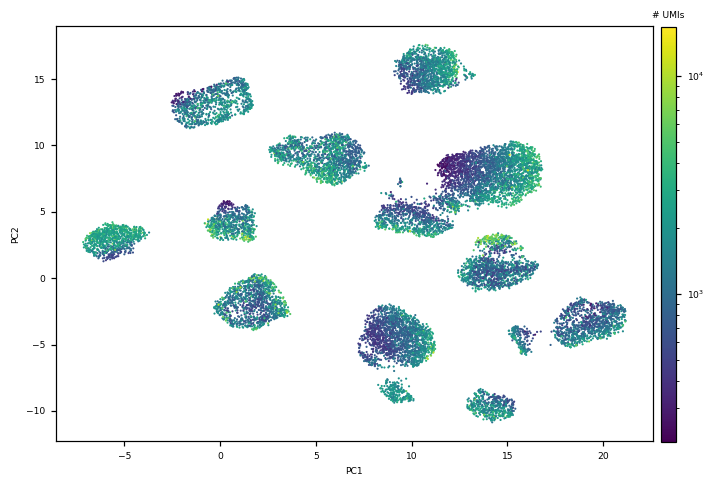

In [101]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["total_UMIs"], norm = LogNorm(),\
    s = 2, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

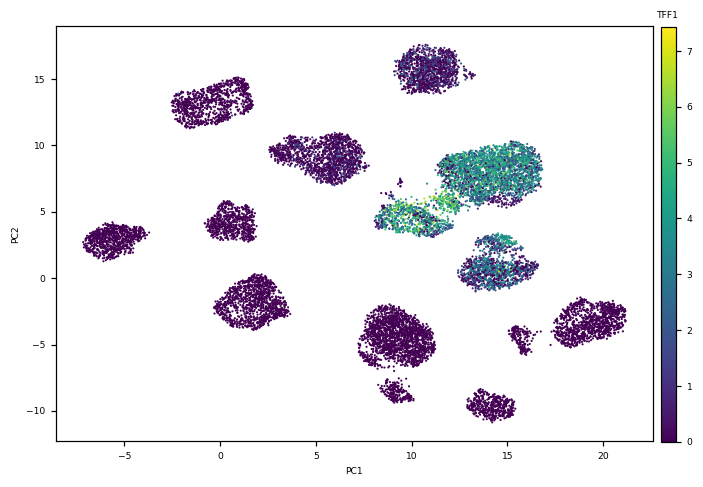

In [105]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var["external_gene_name"]=="TFF1"], \
    s = 2, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "TFF1", fig=scatt, linewidth=0)

/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:891: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'FAM138A']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


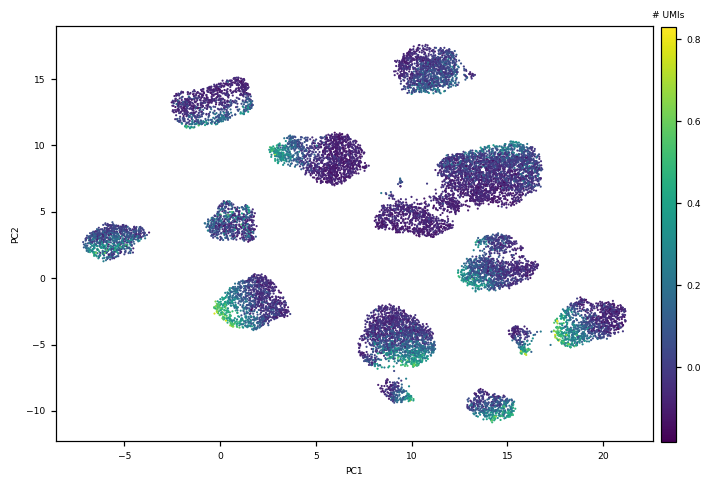

In [103]:
sc.var_names = sc.var["external_gene_name"].values
sc.var_names = np.array(sc.var_names.values)
sc.var_names_make_unique()
scanpy.tl.score_genes_cell_cycle(sc, s_genes=s_genes, g2m_genes=g2m_genes)

scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["G2M_score"],\
    s = 2, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

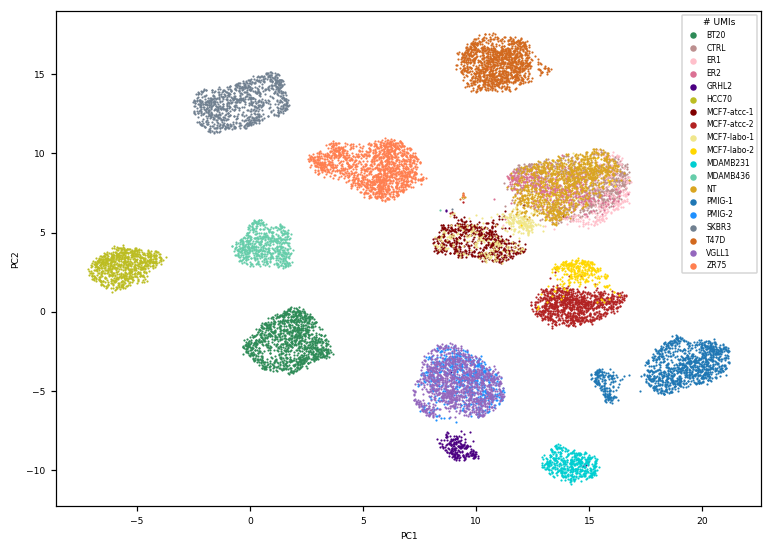

In [104]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 2, palette = samples_colors, xlabel="PC1", ylabel="PC2", color_title = "# UMIs", linewidth=0, fig=scatt)
plt.tight_layout()

### Data integration with harmony

In [402]:
import scanpy as sc
import scanpy.external as sce

In [147]:
sc = anndata.read_h5ad("/home/arion/davidm/Data/datasets/processed/Projects/scBC-Analysis/norm/all-samples-normalized.h5ad")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [416]:
np.unique(sc.obs["samples"])

array(['BT20', 'CTRL', 'ER1', 'ER2', 'GRHL2', 'HCC70', 'MCF7-atcc-1',
       'MCF7-atcc-2', 'MCF7-labo-1', 'MCF7-labo-2', 'MDAMB231',
       'MDAMB436', 'NT', 'PMIG-1', 'PMIG-2', 'SKBR3', 'T47D', 'VGLL1',
       'ZR75'], dtype=object)

In [148]:
samples = ['BT20', 'HCC70', 'MCF7-atcc-2', 'MCF7-labo-2', 'MDAMB231', 'MDAMB436', 'SKBR3', 'T47D','ZR75']
# samples = ['BT20', 'HCC70', 'ER1','CTRL']


sc._inplace_subset_obs([s in samples for s in sc.obs["samples"]])

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [144]:
# scanpy.tl.pca(sc)
scanpy.external.pp.harmony_integrate(sc, 'samples')

2021-12-18 21:50:10,023 - harmonypy - INFO - Iteration 1 of 10
2021-12-18 21:50:10,806 - harmonypy - INFO - Iteration 2 of 10
2021-12-18 21:50:11,568 - harmonypy - INFO - Iteration 3 of 10
2021-12-18 21:50:12,353 - harmonypy - INFO - Converged after 3 iterations


In [145]:
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15, use_rep="X_pca_harmony")
scanpy.tl.umap(sc, n_components=2)

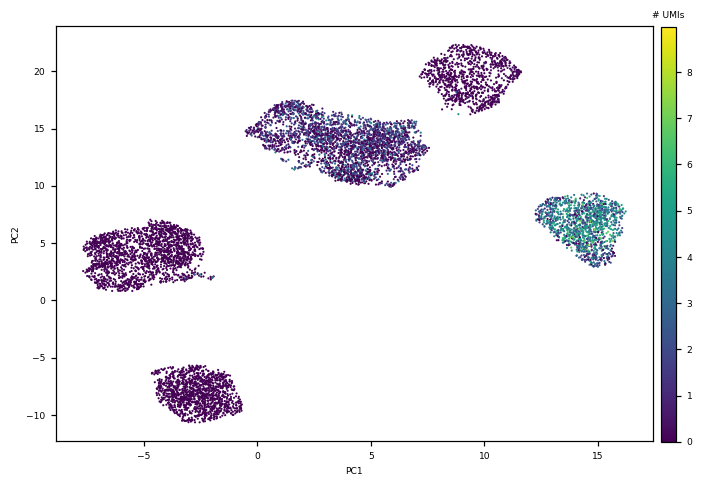

In [421]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var["external_gene_name"]=="TFF1"], \
    s = 2, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:891: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'FAM138A']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


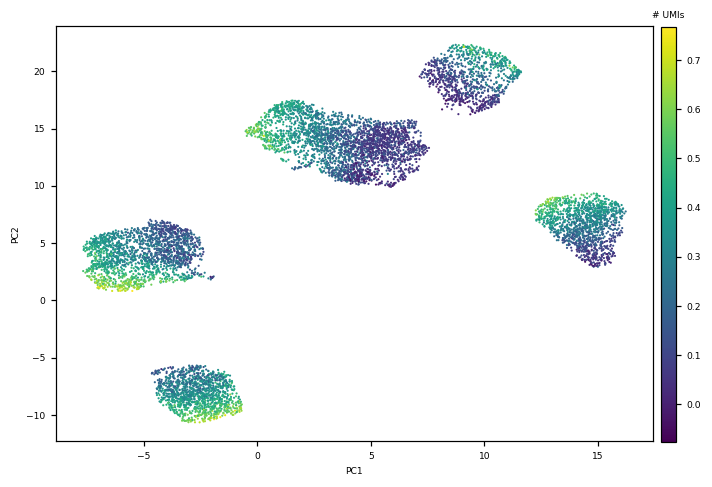

In [422]:
sc.var_names = sc.var["external_gene_name"].values
sc.var_names = np.array(sc.var_names.values)
sc.var_names_make_unique()
scanpy.tl.score_genes_cell_cycle(sc, s_genes=s_genes, g2m_genes=g2m_genes)

scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["G2M_score"],\
    s = 2, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

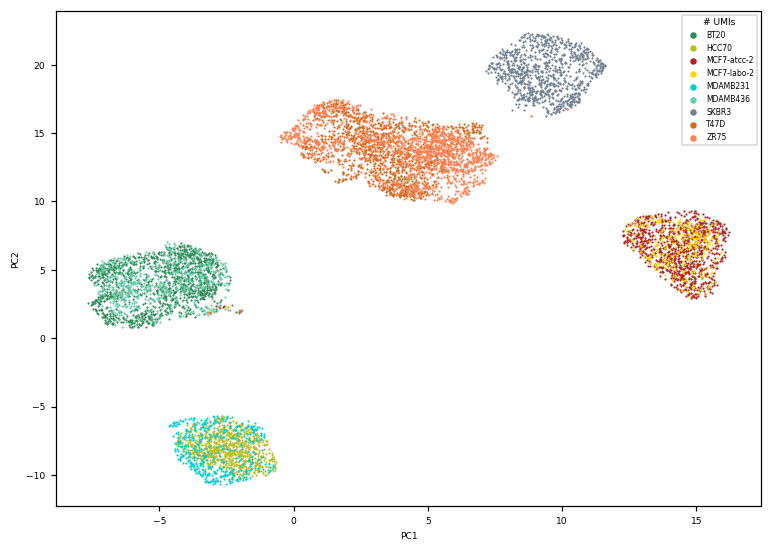

In [423]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 2, palette = samples_colors, xlabel="PC1", ylabel="PC2", color_title = "# UMIs", linewidth=0, fig=scatt)
plt.tight_layout()

### Data integration with scvi

In [151]:
import scvi
import torch

In [152]:
torch.cuda.is_available()

True

In [366]:
sc = anndata.read_h5ad("/home/arion/davidm/Data/datasets/processed/Projects/scBC-Analysis/norm/all-samples-normalized.h5ad")
# sc._inplace_subset_obs(sc.obs["samples"]=="NT")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [250]:
# sc = rnaseq.readwrite.read_raw(project_id  = "dsp779", quant_tool = "alevin", samples = "Sample_N707_-_ER2", genes_id = "ensembl_gene_id", quant_params = "trimmed-reads-cutadapt-all/decoys-k19-1.4.0/customWh-top-3000", genref = genref, cdna = "3' tag", exp = "sc")
# sc.obs_names = sc.obs["CB"]

# rnaseq.setup.annotate_samples(sc, samples_annot_name = "total_UMIs", samples_annot = sc.X.toarray().sum(1).ravel())
# sc._inplace_subset_obs(sc.obs["total_UMIs"] > 100)

/home/arion/davidm/Data/datasets/raw/private/RNA-seq/sc/dsp779/quant/alevin/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/trimmed-reads-cutadapt-all/decoys-k19-1.4.0/customWh-top-3000
Using BioMart Ensembl Genes 100 hsapiens_gene_ensembl for gene annotations.
Annotating total_UMIs...


In [367]:
rnaseq.setup.load_layer(sc, "raw")
scvi.data.setup_anndata(sc) #, batch_key = "samples")

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 14913 cells, 35951 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/scvi/data/_anndata.py:758: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


WARNING  Make sure the registered X field in anndata contains unnormalized count data.       
INFO     Training for 30 epochs                                                              


/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/scvi/core/distributions/_negative_binomial.py:324: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


INFO     KL warmup for 10 epochs                                                             
Training...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [04:07<00:00,  8.25s/it]
INFO     Training time:  166 s. / 30 epochs                                                  


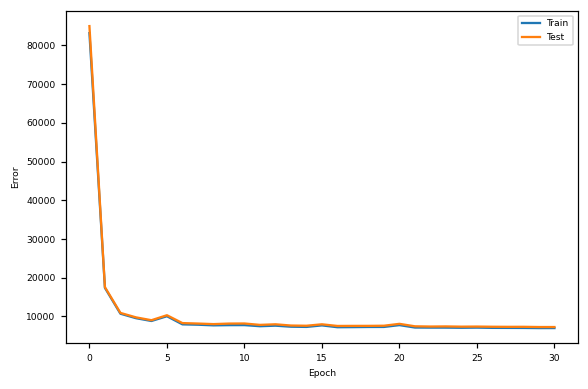

In [368]:
# DEFINE MODEL
model = scvi.model.SCVI(sc,
                        n_hidden=128,
                        n_layers=2,
                        n_latent=20,
                        gene_likelihood='nb',
                        dispersion='gene-cell'
                        )

# MODEL TRAINING
model.train(n_epochs=30, frequency=1, n_epochs_kl_warmup=10, lr=0.001, train_size=0.95)



train_test_results = pd.DataFrame(model.trainer.history).rename(columns={'elbo_train_set':'Train', 'elbo_test_set':'Test'})
# print(train_test_results)

ax = train_test_results.plot()
ax.set_xlabel("Epoch")
ax.set_ylabel("Error")
plt.show()

In [373]:
train_test_results

Train          Test
0   83135.417378  84945.048257
1   17382.812054  17568.485757
2   10718.732618  10927.885221
3    9567.466555   9780.170995
4    8843.323569   9040.235087
5   10068.058600  10329.377849
6    7970.263738   8296.817862
7    7880.012247   8179.804876
8    7714.551171   8033.897118
9    7768.462519   8172.404993
10   7777.020250   8194.368884
11   7491.525107   7834.155747
12   7630.748085   7987.475369
13   7366.425941   7667.433227
14   7310.759573   7613.137148
15   7704.248372   7985.516840
16   7232.801369   7557.908596
17   7257.350264   7575.827664
18   7295.409071   7581.718582
19   7303.787014   7616.503938
20   7774.449226   8104.734836
21   7152.890648   7467.886059
22   7130.606947   7408.548257
23   7129.243502   7437.331518
24   7091.354278   7377.274045
25   7129.790164   7400.746565
26   7066.741375   7354.367041
27   7057.317229   7332.865952
28   7046.331836   7338.271699
29   7006.994971   7283.119973
30   7013.959113   7279.814678

WARNING  Make sure the registered X field in anndata contains unnormalized count data.       


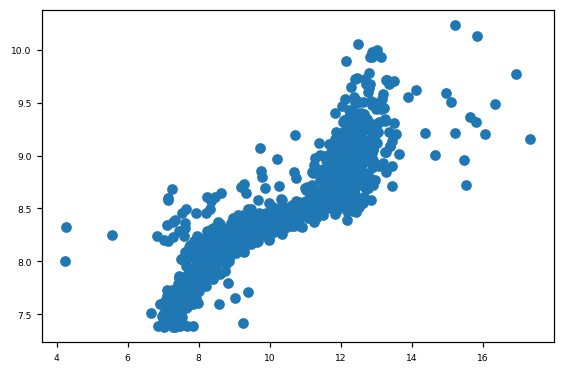

In [361]:
plt.scatter(np.log(model.get_latent_library_size()),np.log(sc.obs["total_UMIs"]));

In [370]:
sc.obsm["X_scvi"] = model.get_latent_representation()

WARNING  Make sure the registered X field in anndata contains unnormalized count data.       


In [371]:
scanpy.pp.neighbors(sc, n_neighbors=15, use_rep="X_scvi")
scanpy.tl.umap(sc, n_components=2)

Normalization by total UMIs...
Log2 + 1 tranformation...


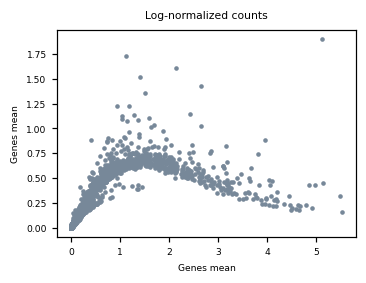

In [364]:
rnaseq.pp.log_norm(sc, plot=True, inplace=True, verbose = True)

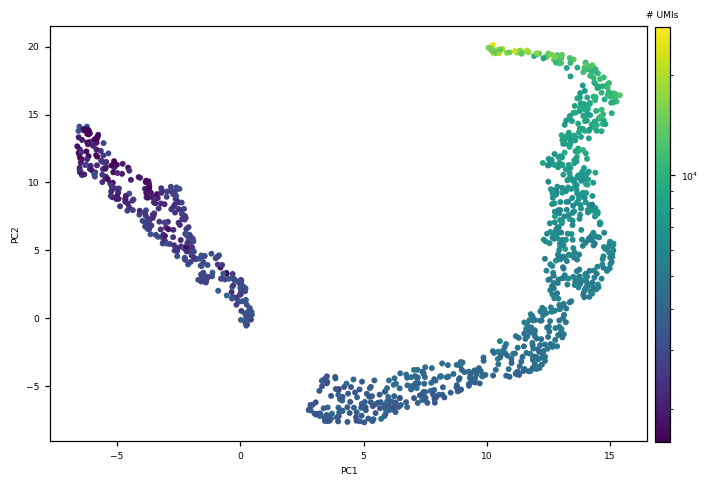

In [365]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["total_UMIs"], norm = LogNorm(),\
    s = 15, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

In [305]:
rnaseq.setup.annotate_genes(sc)

external_gene_name already annotated. Set ow = True if you want to overwrite.


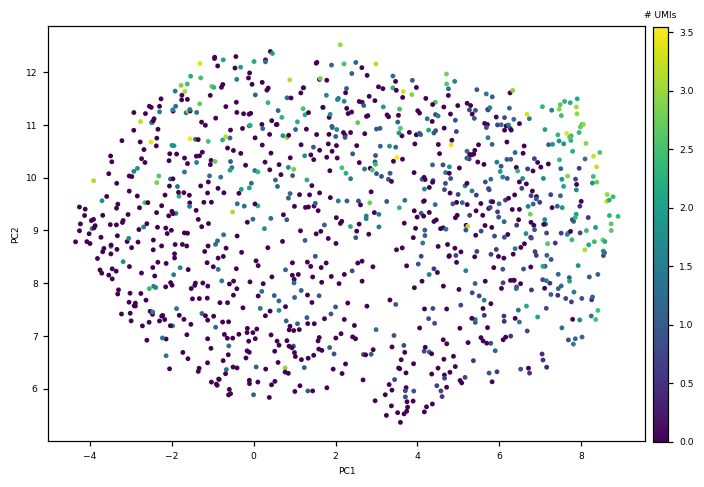

In [349]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.X.toarray()[:,sc.var["external_gene_name"]=="CCNB1"], \
    s = 10, palette = "viridis", xlabel="PC1", ylabel="PC2", color_title = "# UMIs", fig=scatt, linewidth=0)

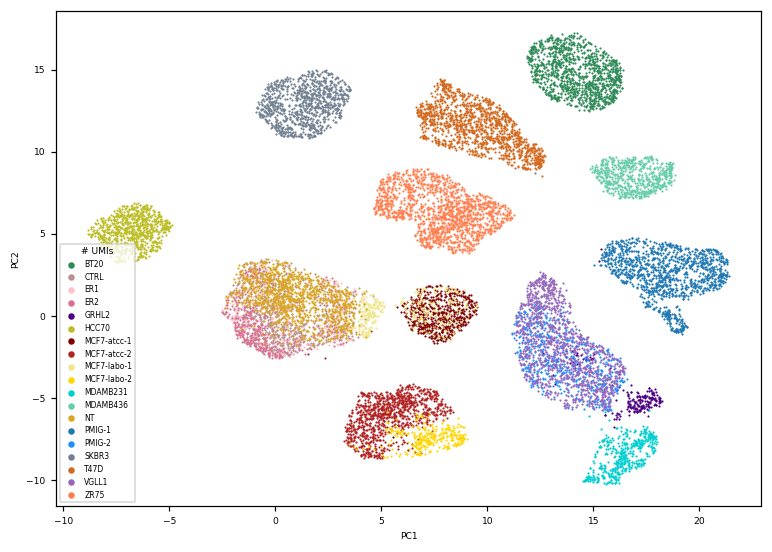

In [159]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 2, palette = samples_colors, xlabel="PC1", ylabel="PC2", color_title = "# UMIs", linewidth=0, fig=scatt)
plt.tight_layout()

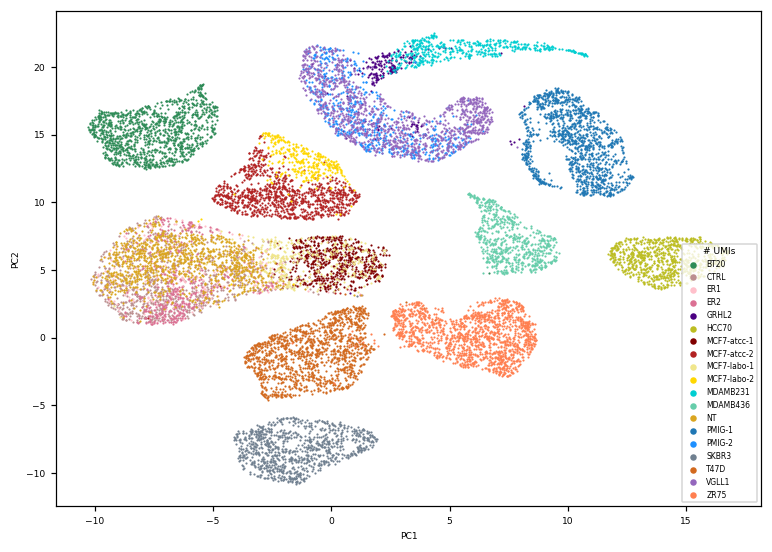

In [372]:
scatt,_ = plt.subplots(figsize=(7,5))
rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["samples"], markerscale=3,\
    s = 2, palette = samples_colors, xlabel="PC1", ylabel="PC2", color_title = "# UMIs", linewidth=0, fig=scatt)
plt.tight_layout()